In [ ]:
'''
심볼 12개의 일봉 데이터 저장
'''

In [3]:
import yfinance as yf
import pandas as pd

# Define the 12 symbols
symbols = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLB", "XLRE", "XLU"]

# Define the start and end dates for each year
start_date = "2019-01-01"
end_date = "2024-06-30"

# Fetch daily data for each symbol and merge into a single DataFrame
all_data = pd.DataFrame()

for symbol in symbols:
    ticker = yf.Ticker(symbol)
    df = ticker.history(start=start_date, end=end_date, interval="1d")[["Volume"]]
    df.rename(columns={"Volume": symbol}, inplace=True)
    if all_data.empty:
        all_data = df
    else:
        all_data = all_data.join(df, how='outer')

# Reset the index to include date in columns
all_data.reset_index(inplace=True)

# Split the data by year and save each year to a separate CSV file
for year in range(2019, 2025):
    if year == 2024:
        yearly_data = all_data[(all_data['Date'] >= f'{year}-01-01') & (all_data['Date'] <= '2024-06-30')]
    else:
        yearly_data = all_data[(all_data['Date'] >= f'{year}-01-01') & (all_data['Date'] <= f'{year}-12-31')]
    
    file_path = f"sp500_sector_volume_{year}.csv"
    yearly_data.to_csv(file_path, index=False)
    print(f"Data for {year} saved to {file_path}")


Data for 2019 saved to sp500_sector_volume_2019.csv
Data for 2020 saved to sp500_sector_volume_2020.csv
Data for 2021 saved to sp500_sector_volume_2021.csv
Data for 2022 saved to sp500_sector_volume_2022.csv
Data for 2023 saved to sp500_sector_volume_2023.csv
Data for 2024 saved to sp500_sector_volume_2024.csv


In [ ]:
'''
12개의 심볼 연도별 시각화
'''

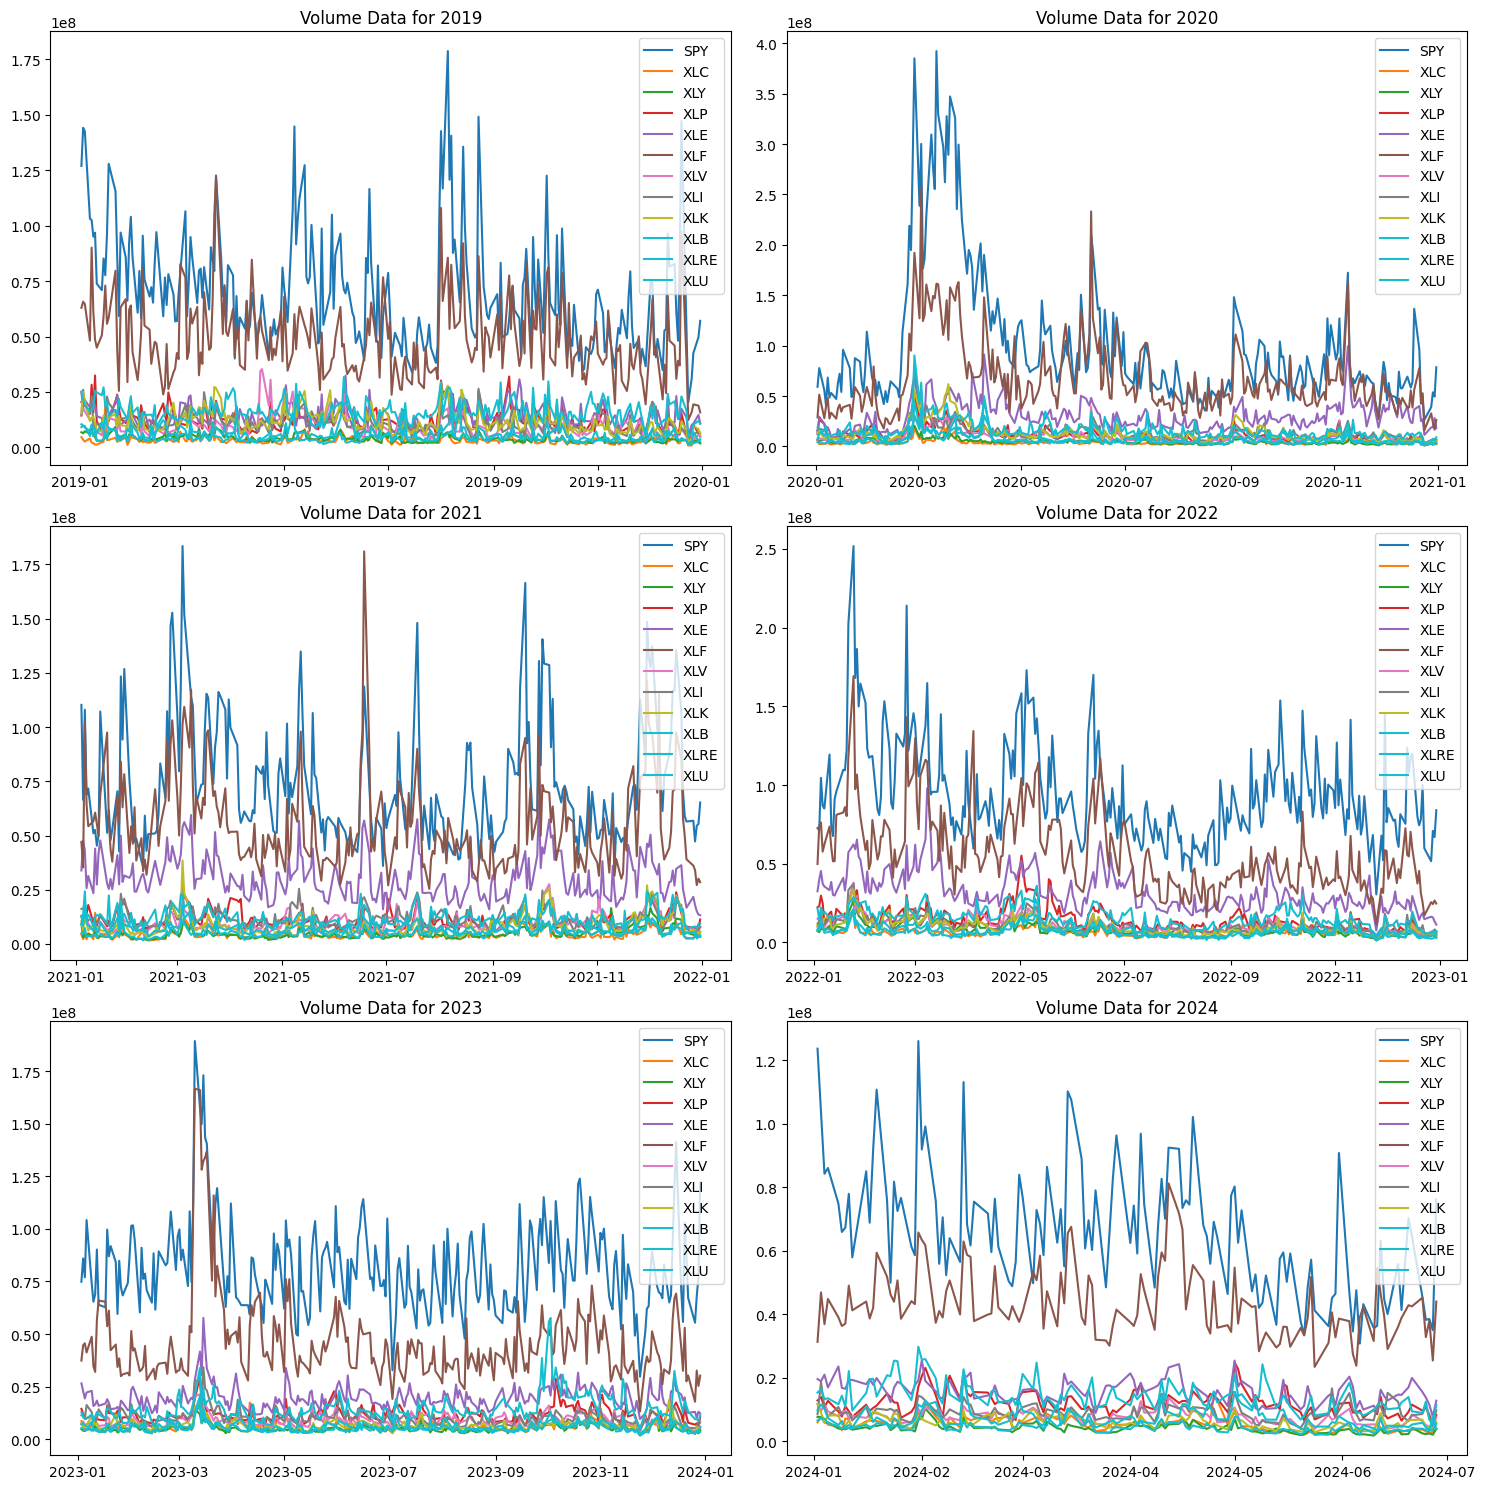

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the 12 symbols
symbols = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLB", "XLRE", "XLU"]

# Define the start and end dates for each year
start_date = "2019-01-01"
end_date = "2024-06-30"

# Fetch daily data for each symbol and merge into a single DataFrame
all_data = pd.DataFrame()

for symbol in symbols:
    ticker = yf.Ticker(symbol)
    df = ticker.history(start=start_date, end=end_date, interval="1d")[["Volume"]]
    df.rename(columns={"Volume": symbol}, inplace=True)
    if all_data.empty:
        all_data = df
    else:
        all_data = all_data.join(df, how='outer')

# Reset the index to include date in columns
all_data.reset_index(inplace=True)

# Function to plot data for each year with different colors
def plot_data_for_year(year, data, ax):
    colors = plt.colormaps['tab10']
    for i, symbol in enumerate(symbols):
        yearly_data = data[(data['Date'] >= f'{year}-01-01') & (data['Date'] <= f'{year}-12-31')]
        ax.plot(yearly_data['Date'], yearly_data[symbol], label=symbol, color=colors(i))
    ax.set_title(f"Volume Data for {year}")
    ax.legend(loc='upper right')

# Create a figure with subplots for each year
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot data for each year
for i, year in enumerate(range(2019, 2025)):
    row, col = divmod(i, 2)
    plot_data_for_year(year, all_data, axes[row, col])

plt.tight_layout()
plt.show()


In [ ]:
'''
12개의 심볼 연도별 시각화 저장
'''

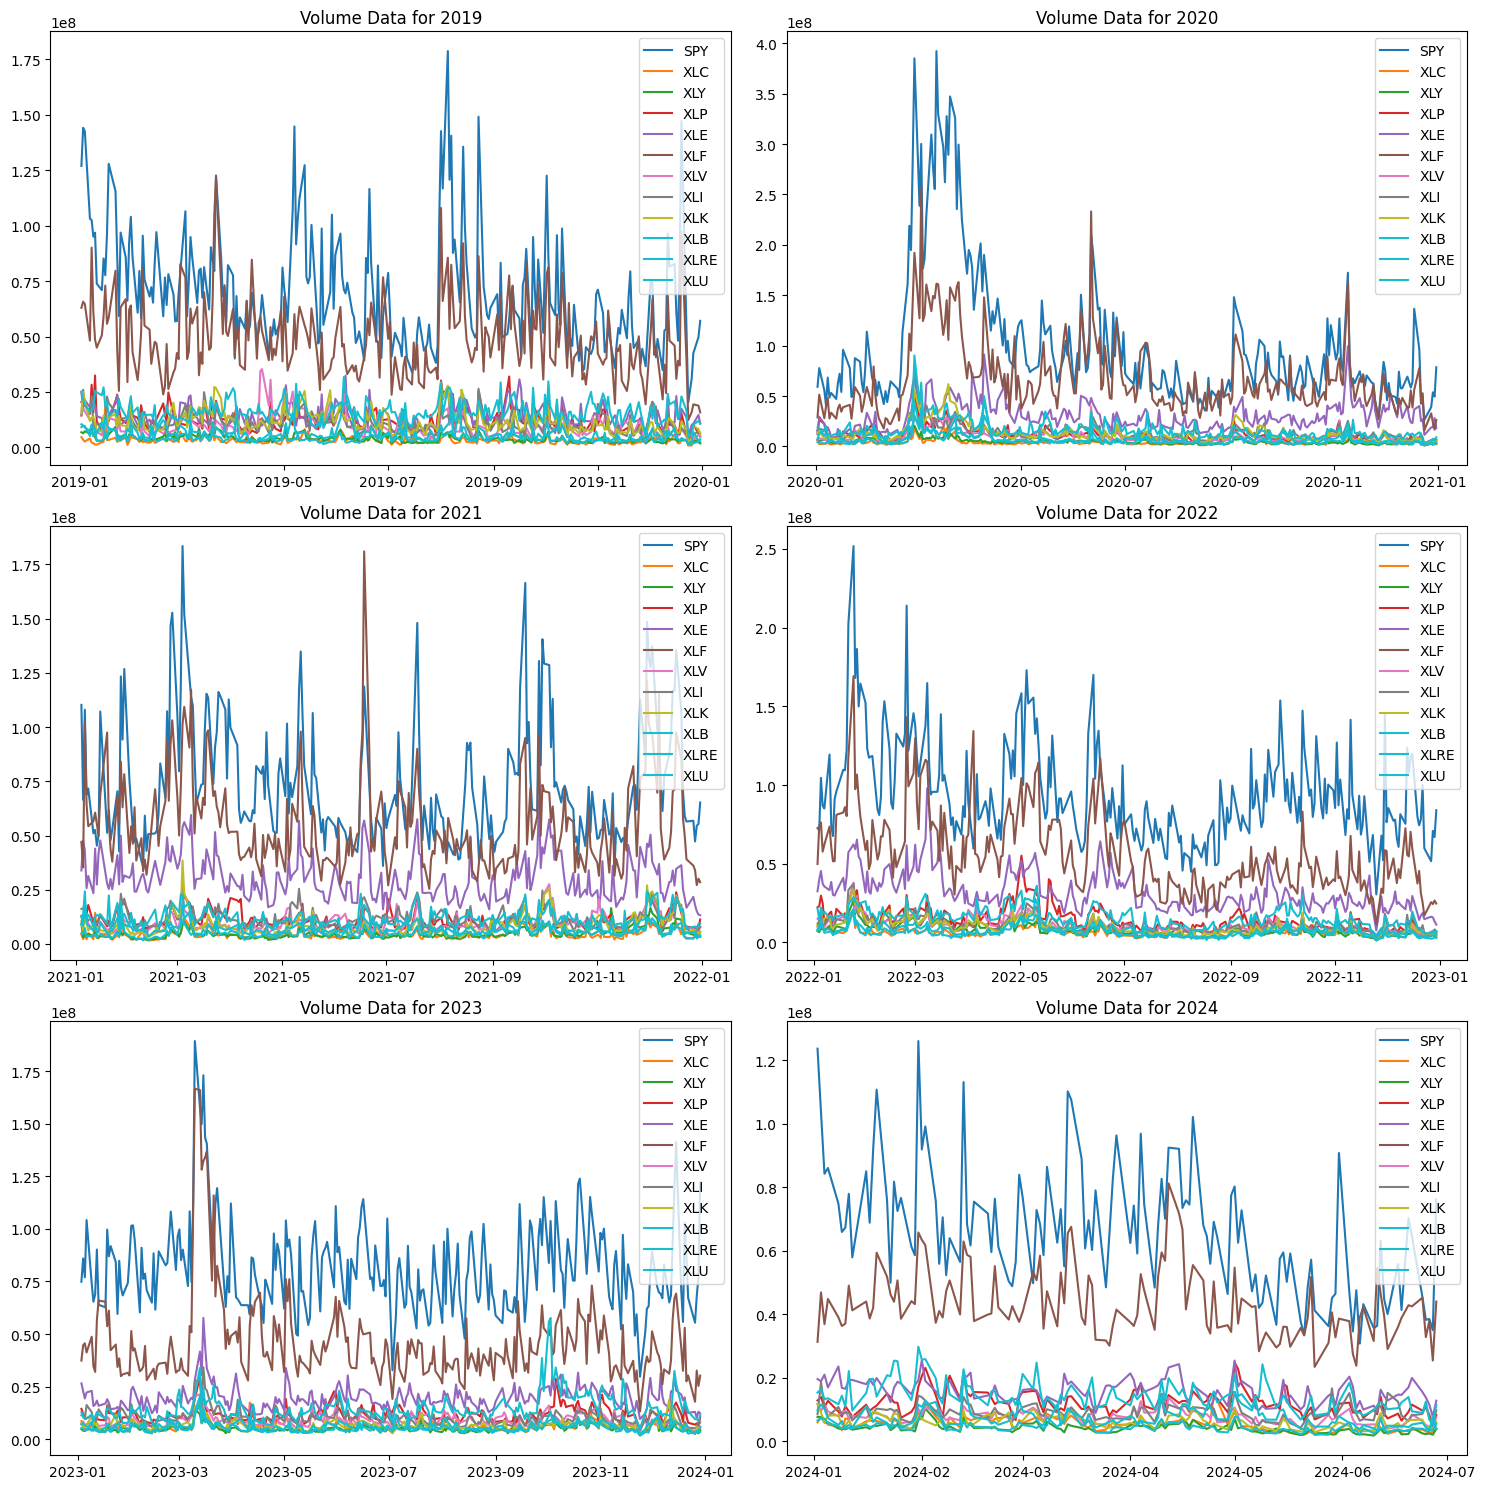

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the 12 symbols
symbols = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLB", "XLRE", "XLU"]

# Define the start and end dates for each year
start_date = "2019-01-01"
end_date = "2024-06-30"

# Fetch daily data for each symbol and merge into a single DataFrame
all_data = pd.DataFrame()

for symbol in symbols:
    ticker = yf.Ticker(symbol)
    df = ticker.history(start=start_date, end=end_date, interval="1d")[["Volume"]]
    df.rename(columns={"Volume": symbol}, inplace=True)
    if all_data.empty:
        all_data = df
    else:
        all_data = all_data.join(df, how='outer')

# Reset the index to include date in columns
all_data.reset_index(inplace=True)

# Function to plot data for each year with different colors
def plot_data_for_year(year, data):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.colormaps['tab10']
    for i, symbol in enumerate(symbols):
        yearly_data = data[(data['Date'] >= f'{year}-01-01') & (data['Date'] <= f'{year}-12-31')]
        ax.plot(yearly_data['Date'], yearly_data[symbol], label=symbol, color=colors(i))
    ax.set_title(f"Volume Data for {year}")
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f"sp500_sector_volume_{year}.png")
    plt.close(fig)

# Plot and save data for each year individually
for year in range(2019, 2025):
    plot_data_for_year(year, all_data)

# Plot data for all years together
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, year in enumerate(range(2019, 2025)):
    row, col = divmod(i, 2)
    colors = plt.colormaps['tab10']
    for j, symbol in enumerate(symbols):
        yearly_data = all_data[(all_data['Date'] >= f'{year}-01-01') & (all_data['Date'] <= f'{year}-12-31')]
        axes[row, col].plot(yearly_data['Date'], yearly_data[symbol], label=symbol, color=colors(j))
    axes[row, col].set_title(f"Volume Data for {year}")
    axes[row, col].legend(loc='upper right')

plt.tight_layout()
plt.savefig("sp500_sector_volume_all_years.png")
plt.show()


In [ ]:
'''
fomc 날짜 기준 거래량 변화
'''

XLC: Data doesn't exist for startDate = 1516770000, endDate = 1517979600


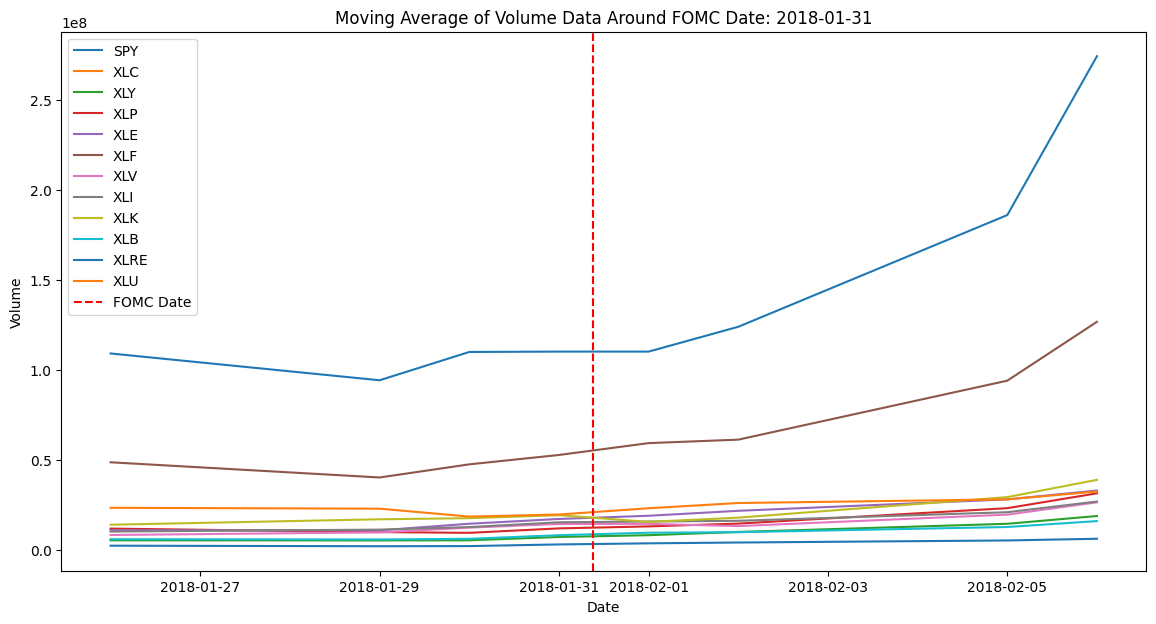

XLC: Data doesn't exist for startDate = 1521000000, endDate = 1522209600


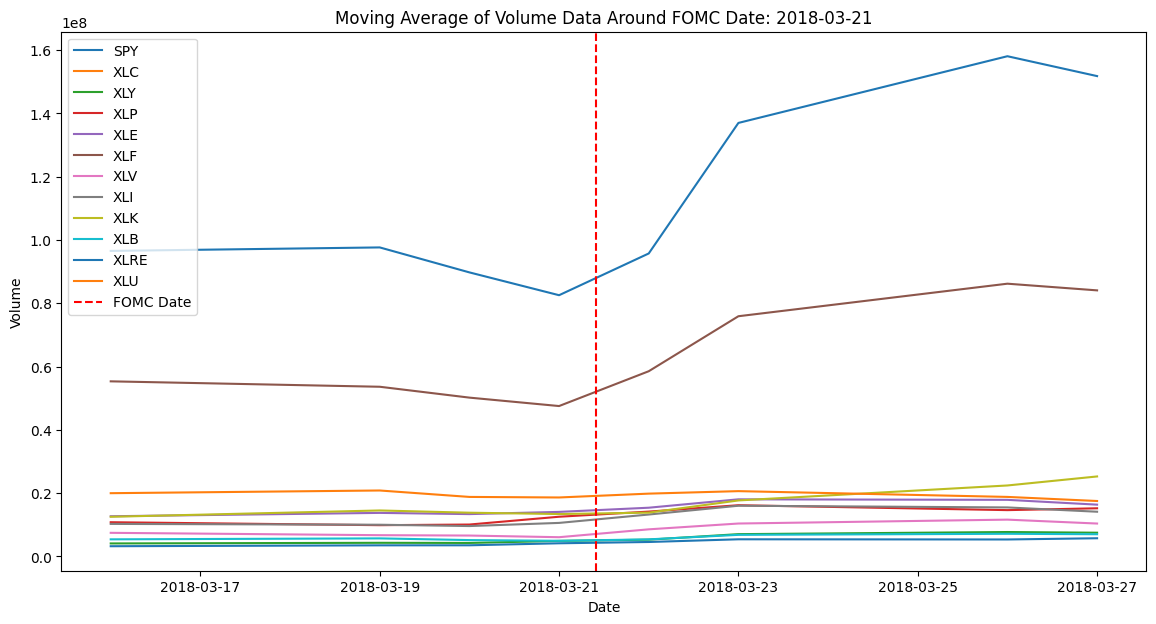

XLC: Data doesn't exist for startDate = 1524628800, endDate = 1525838400


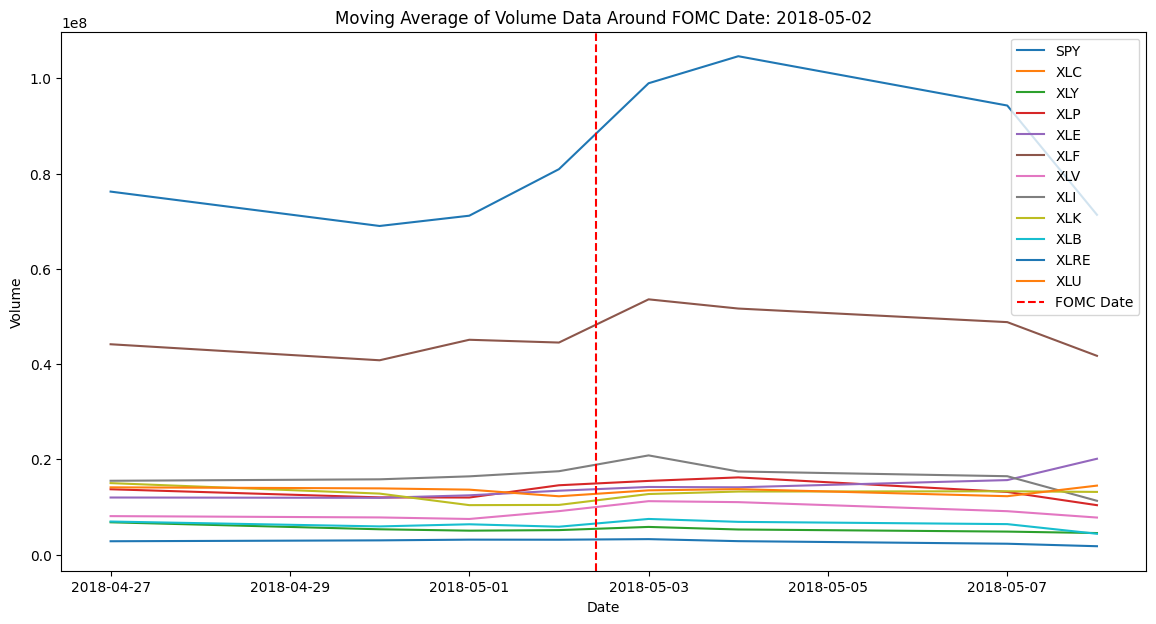

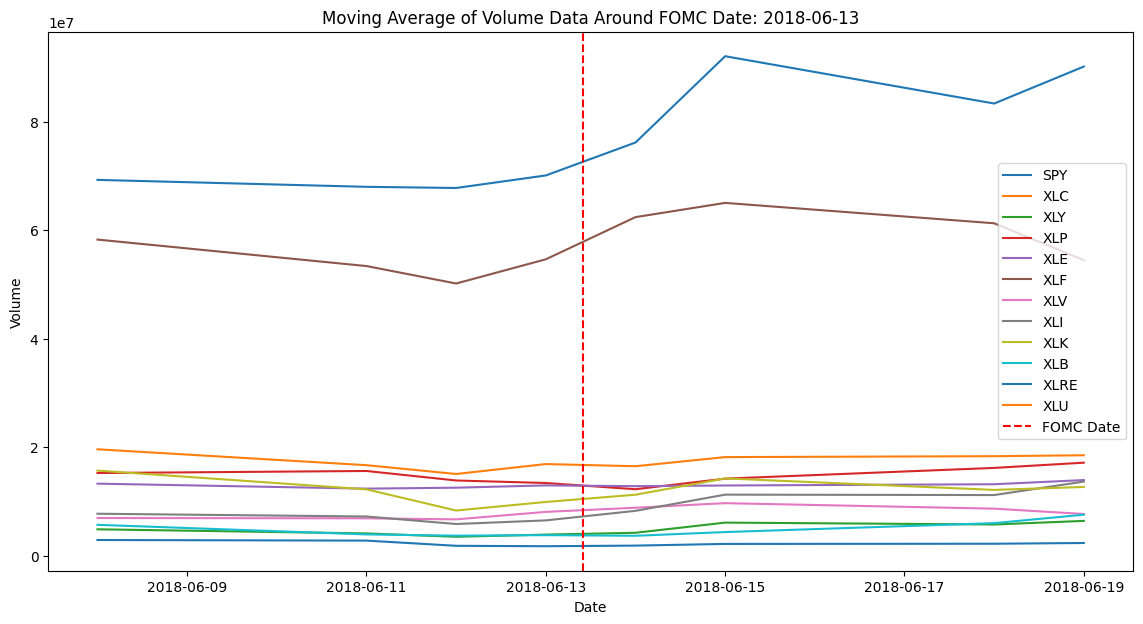

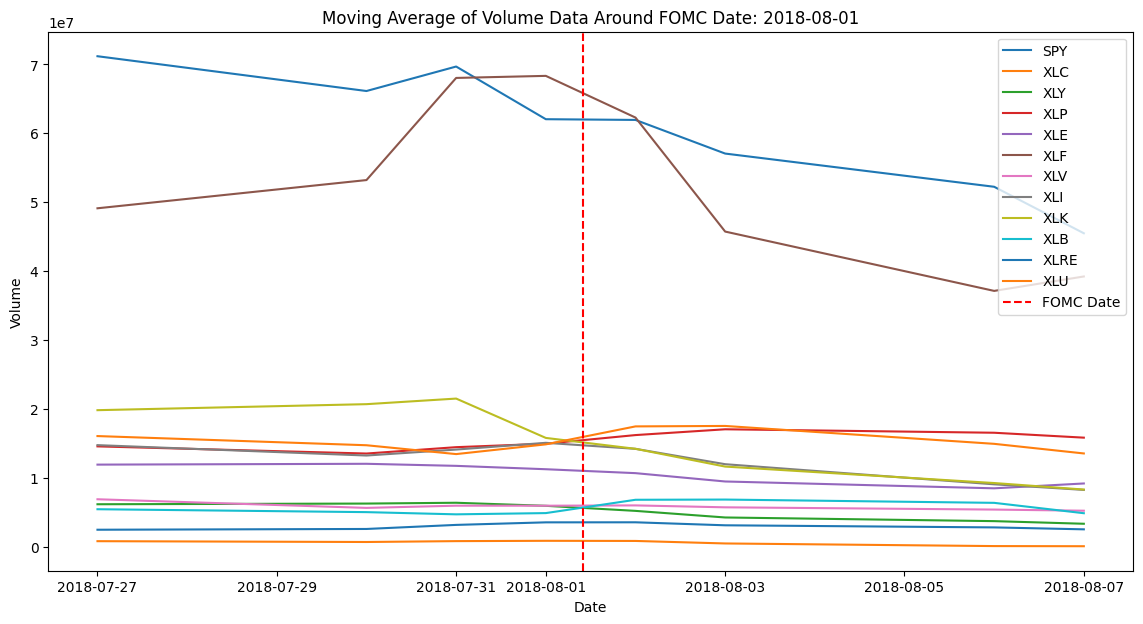

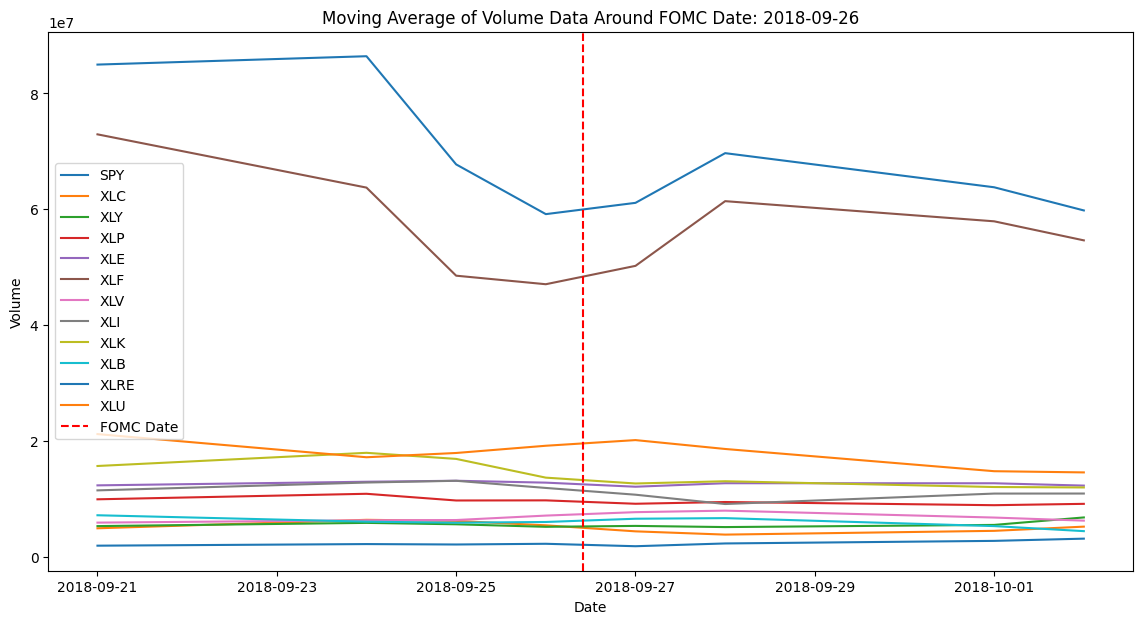

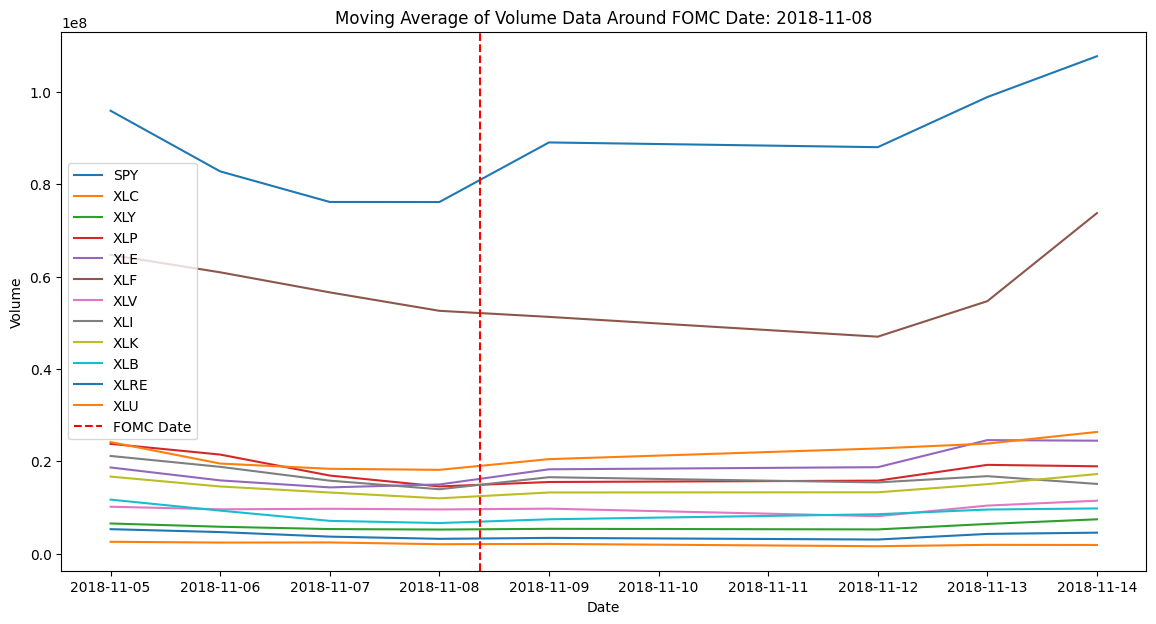

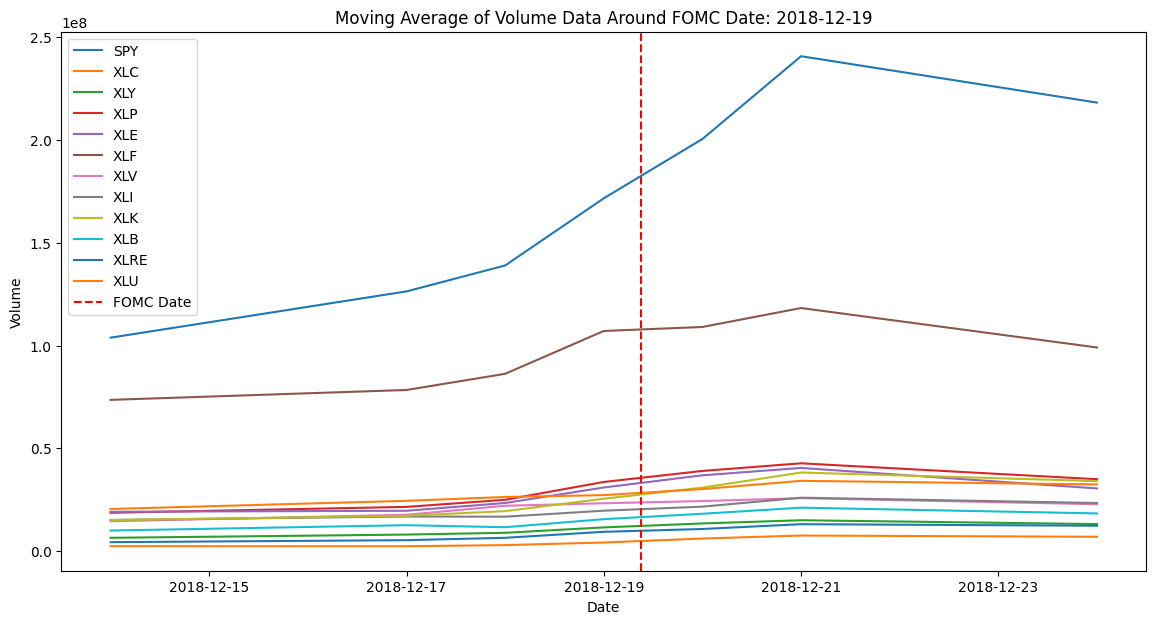

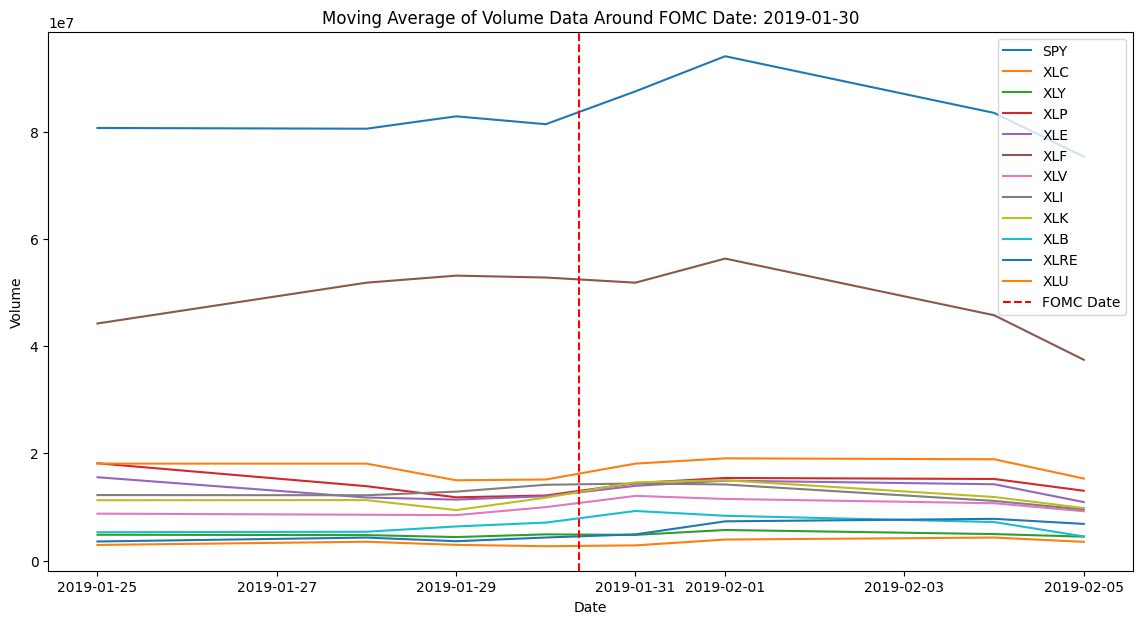

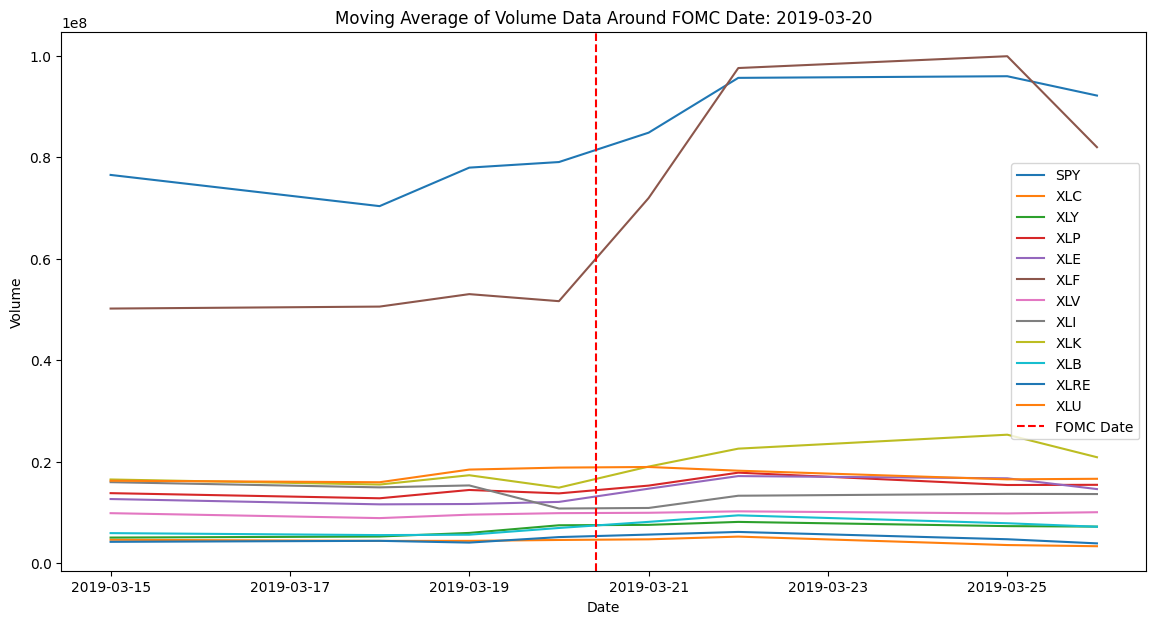

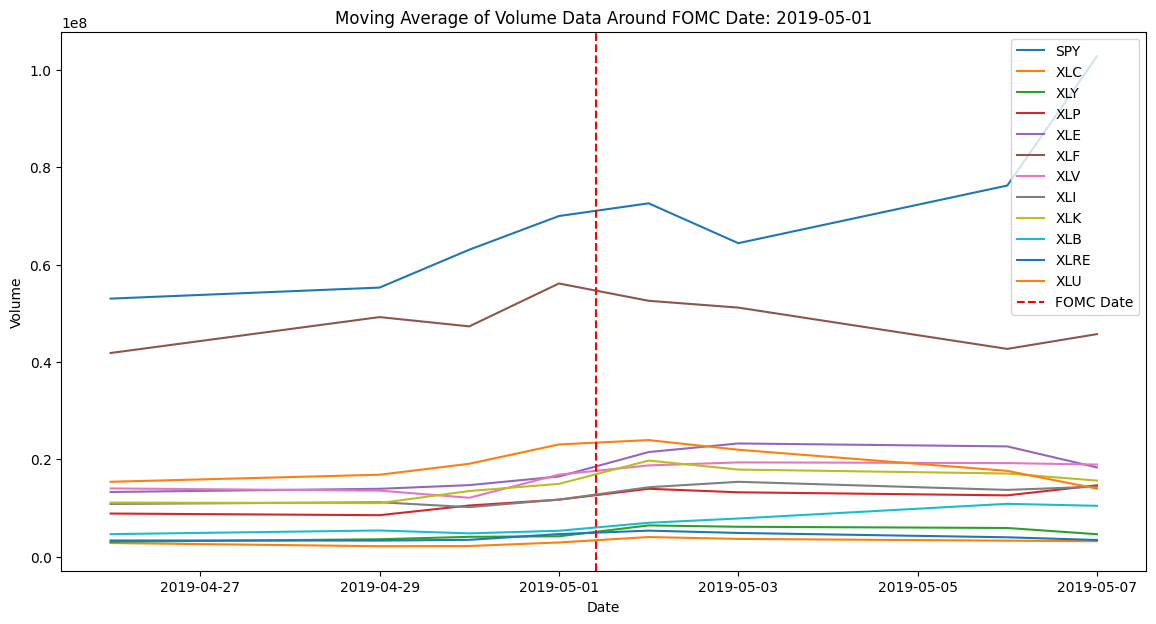

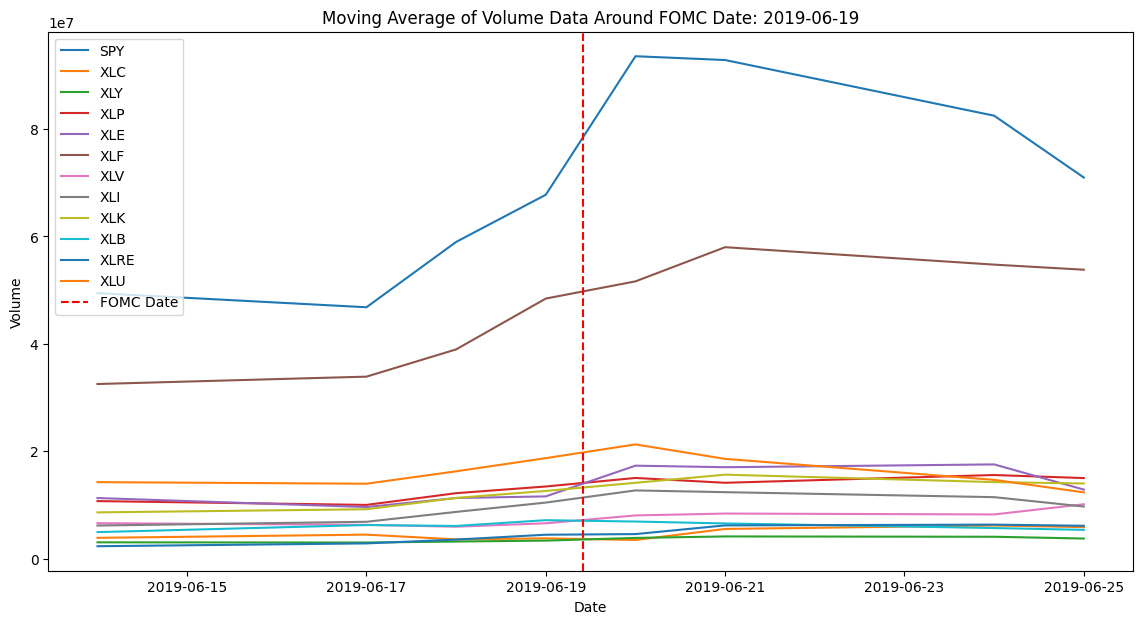

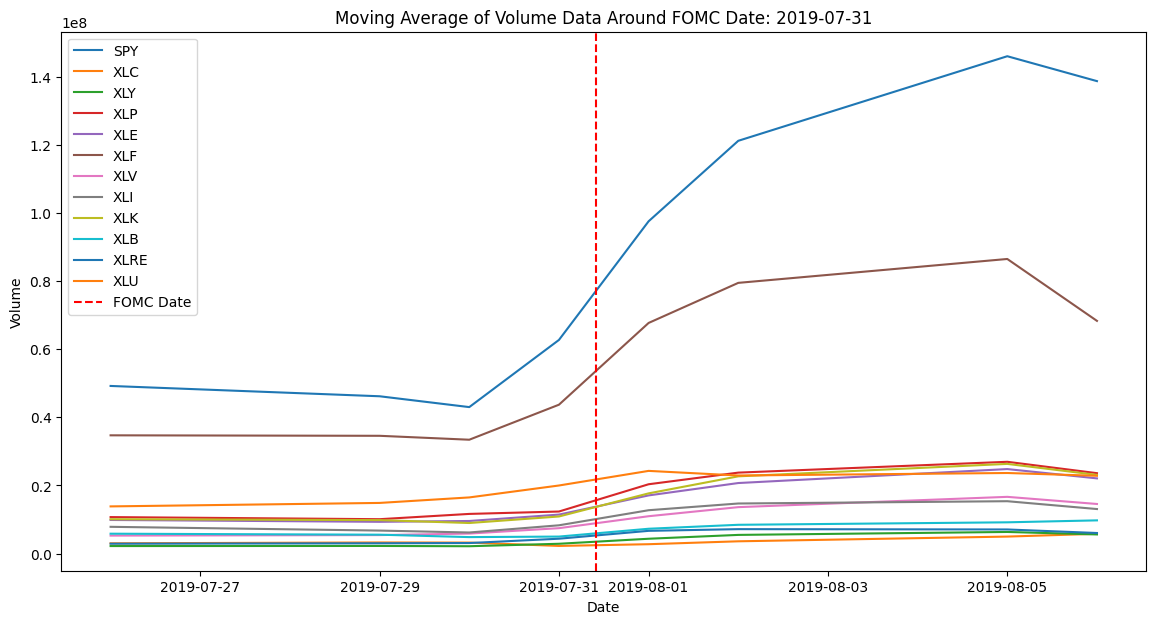

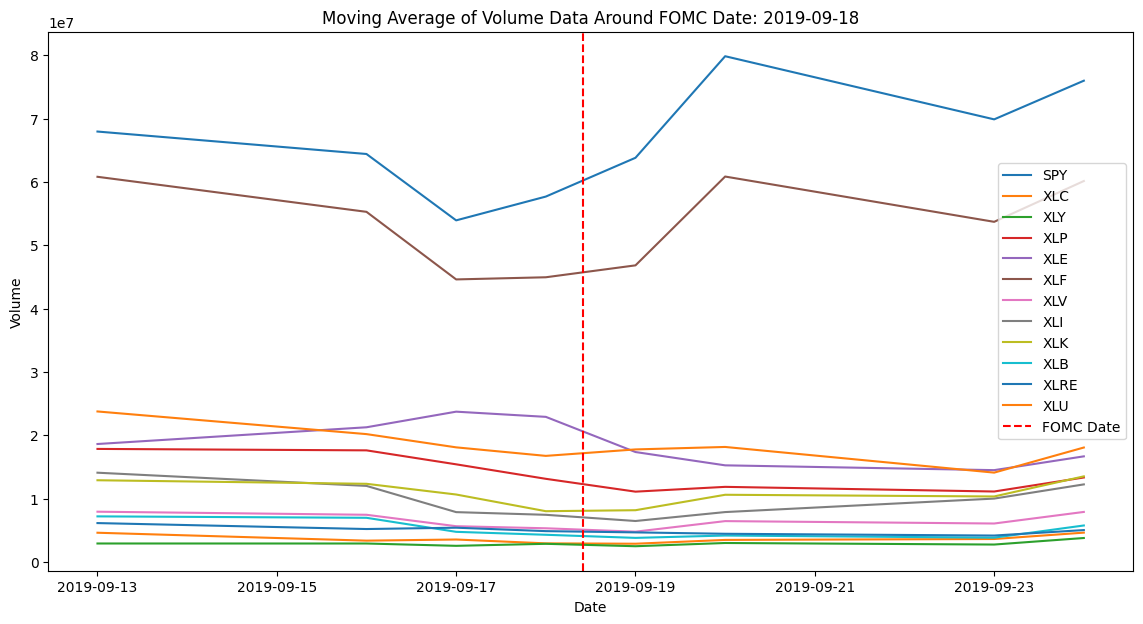

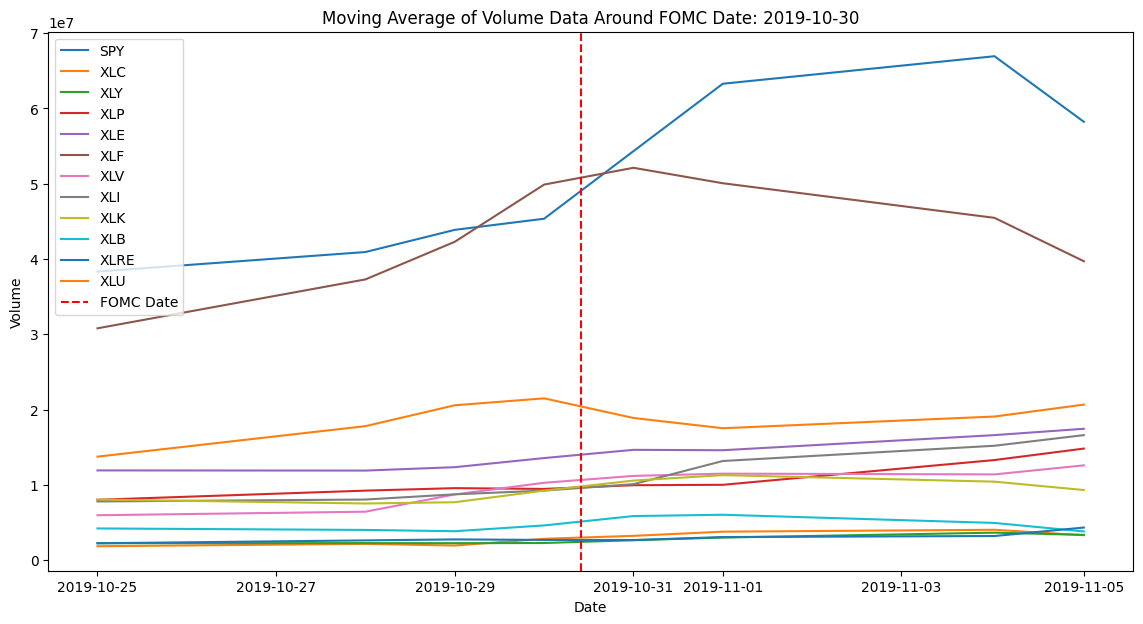

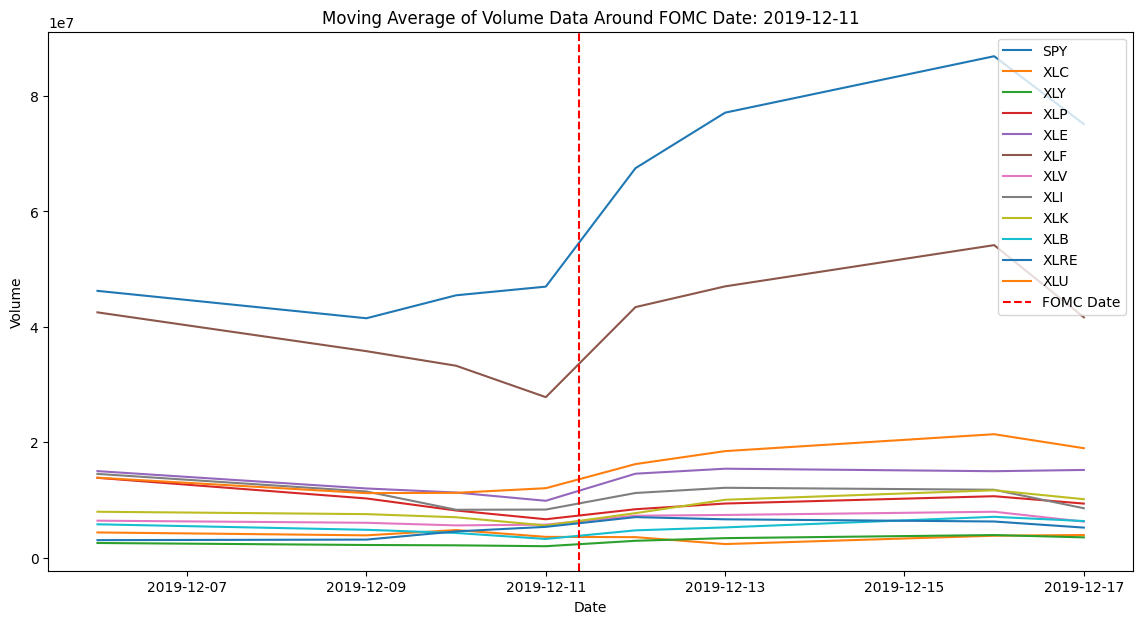

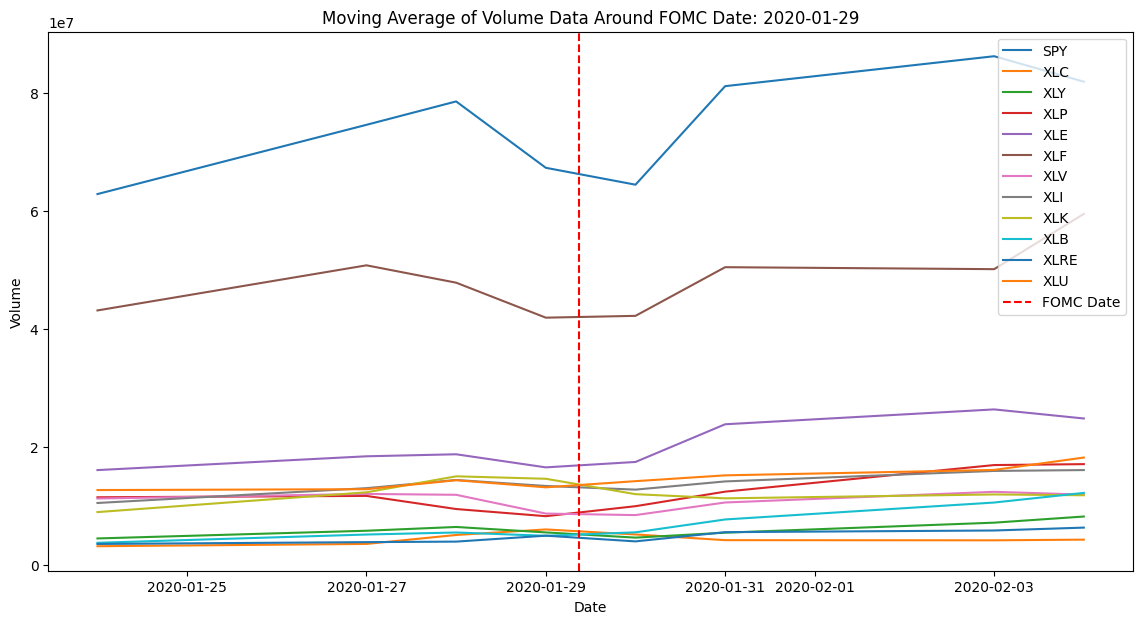

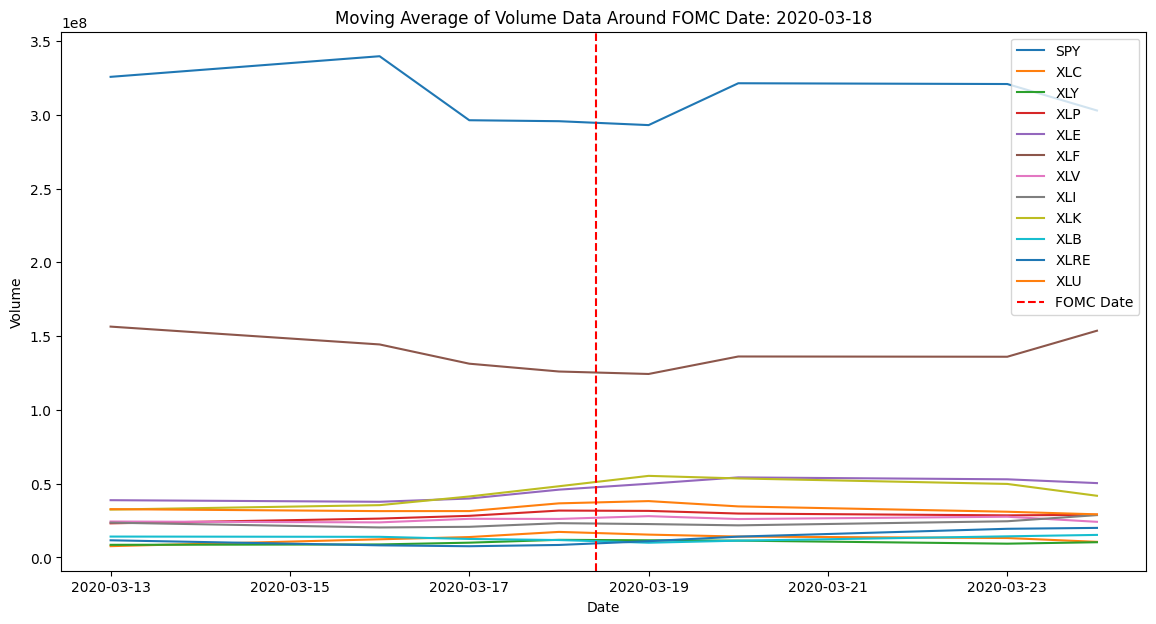

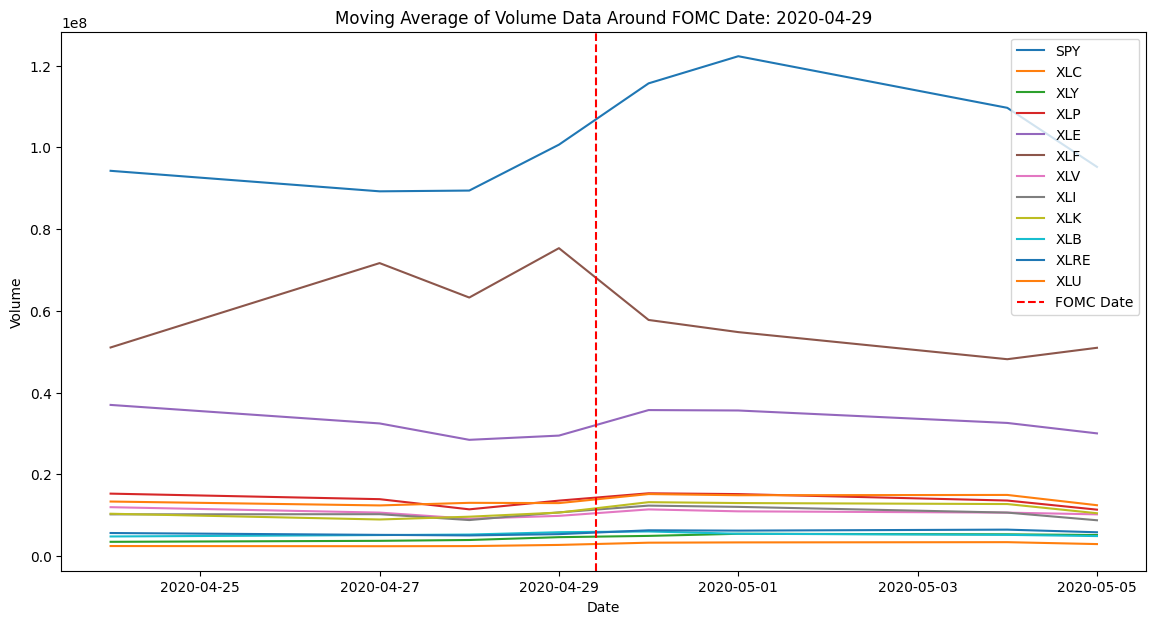

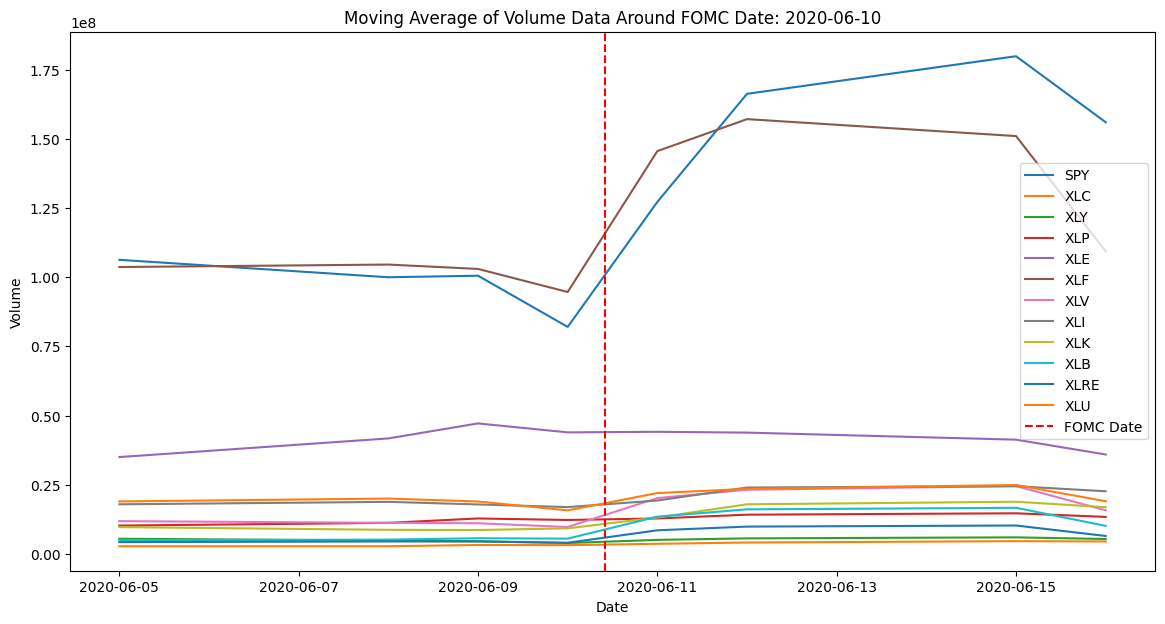

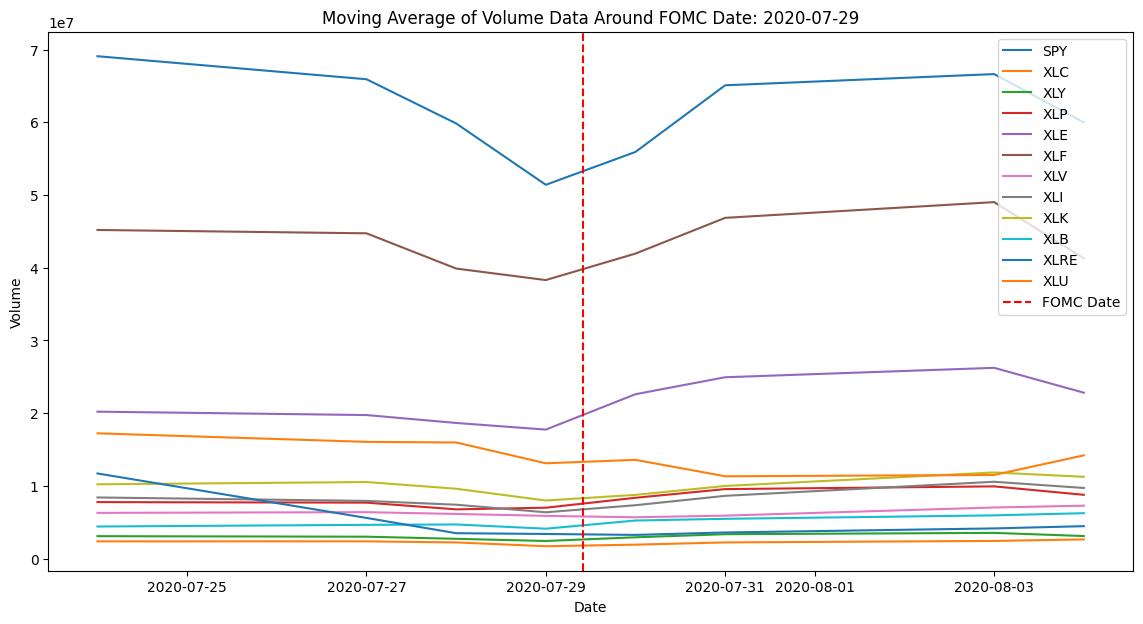

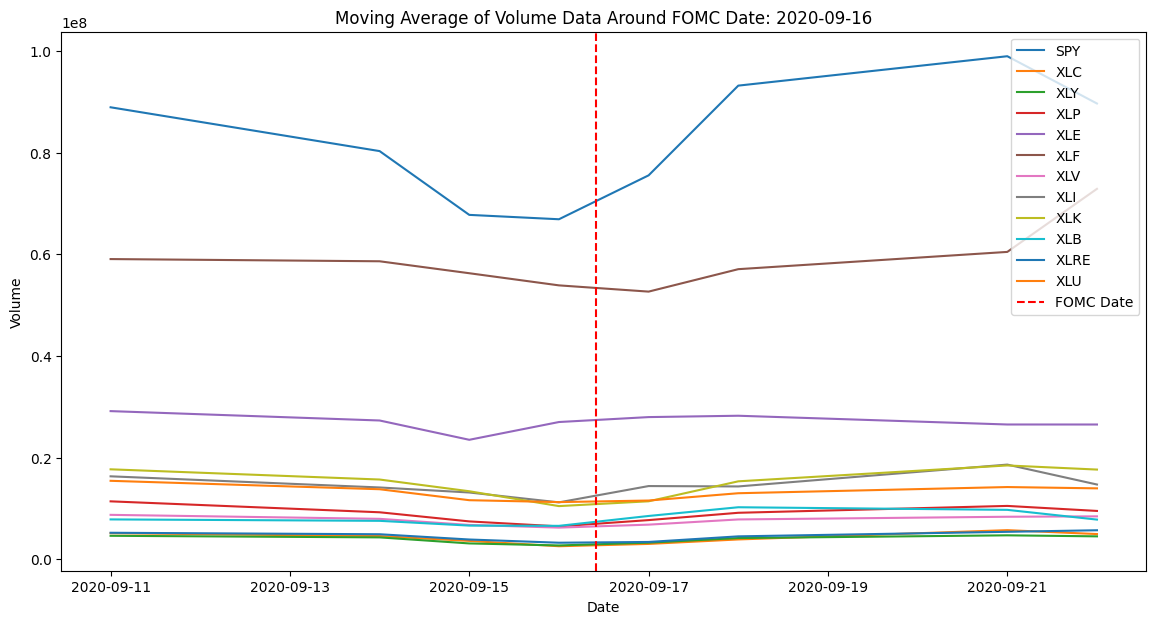

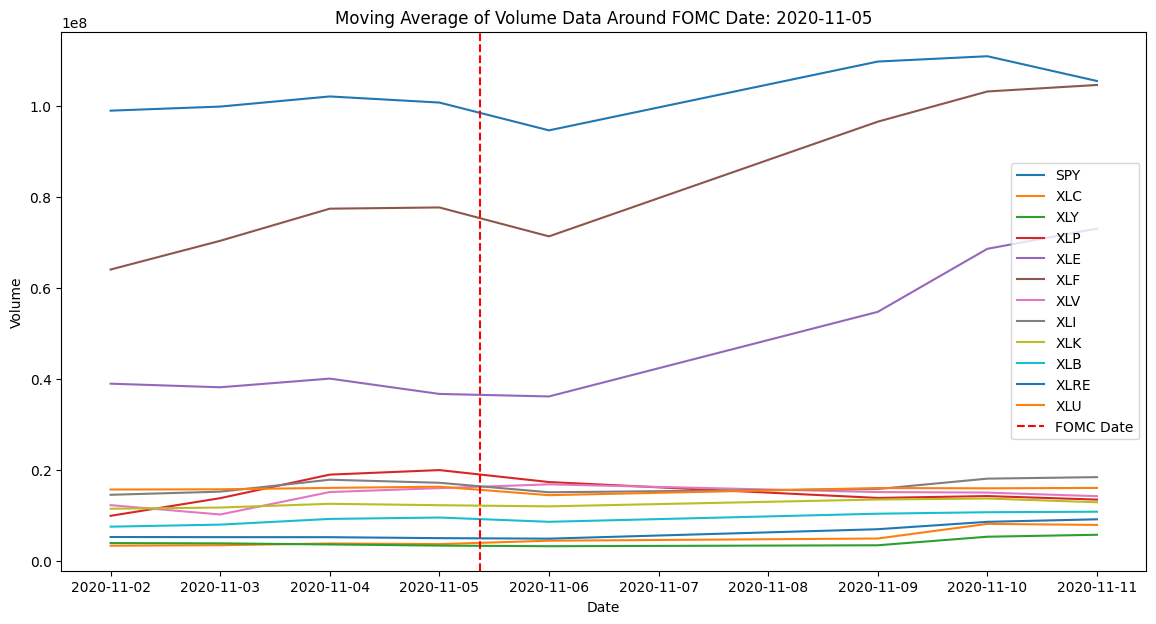

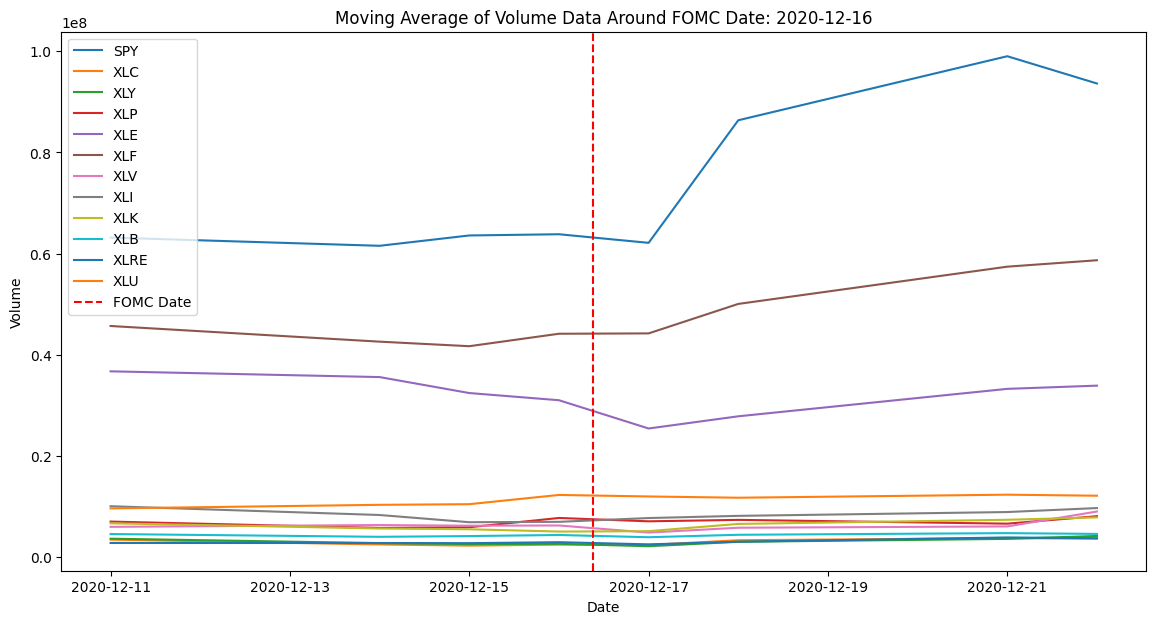

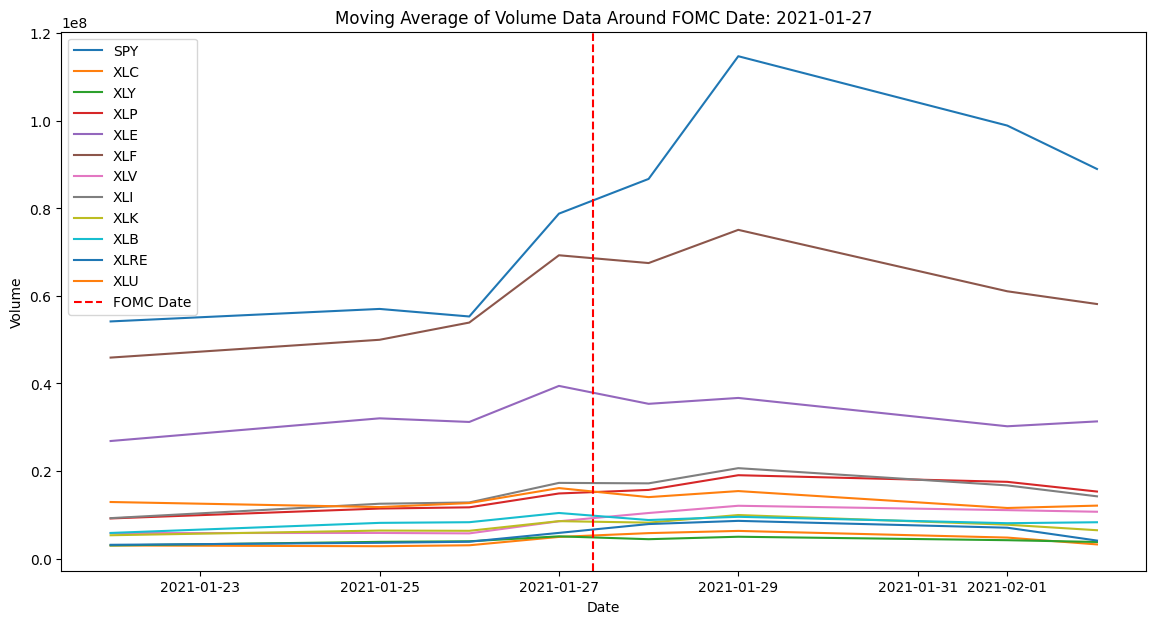

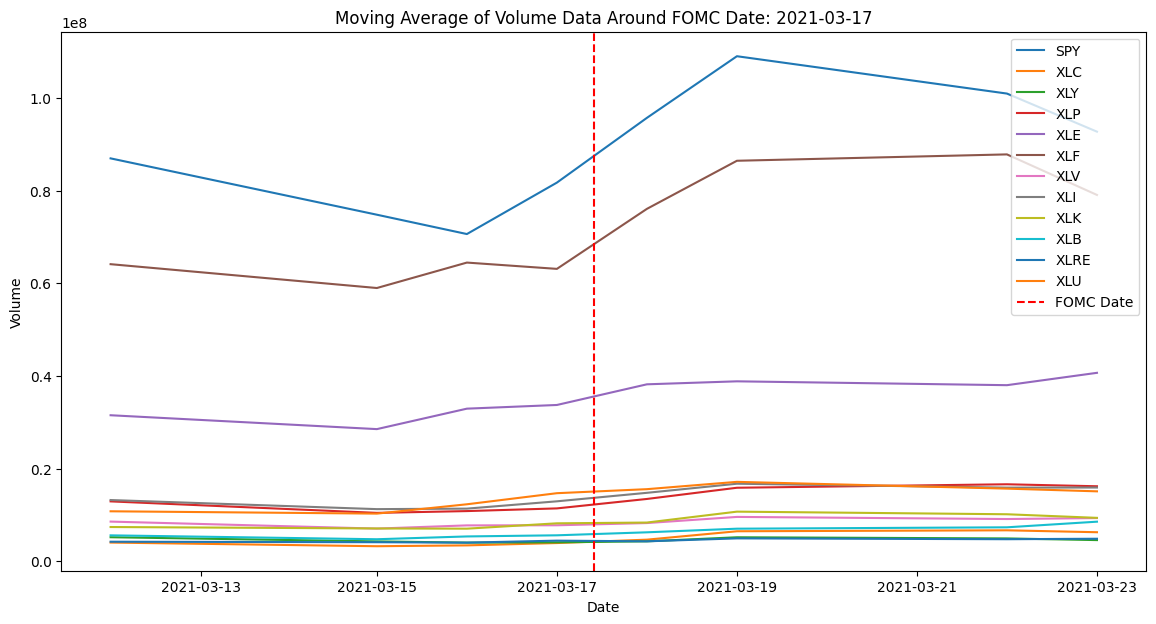

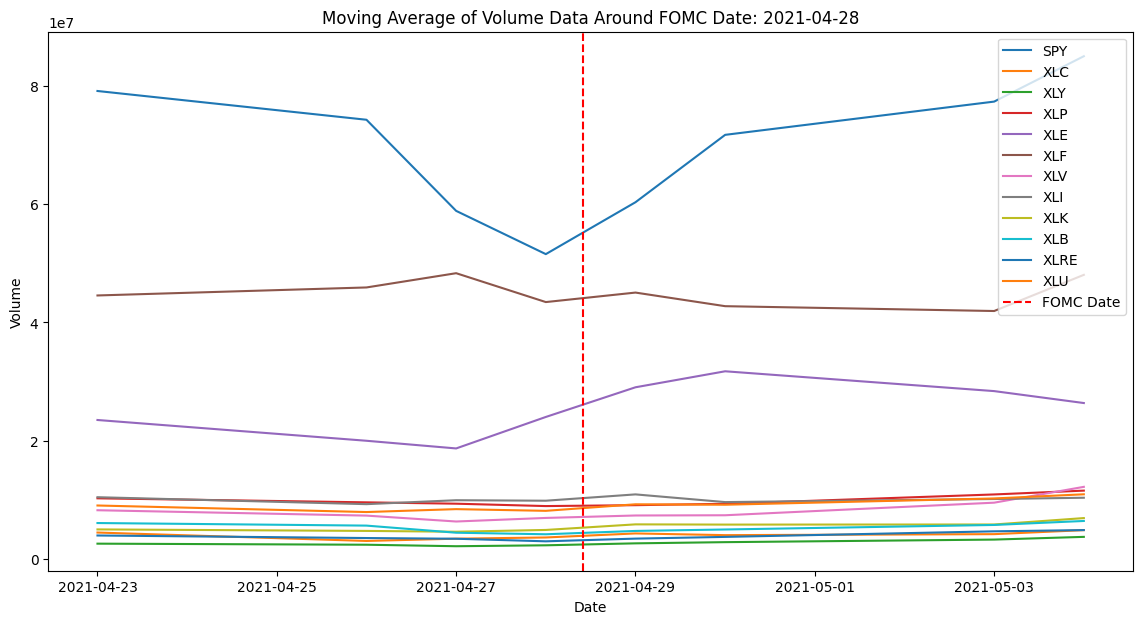

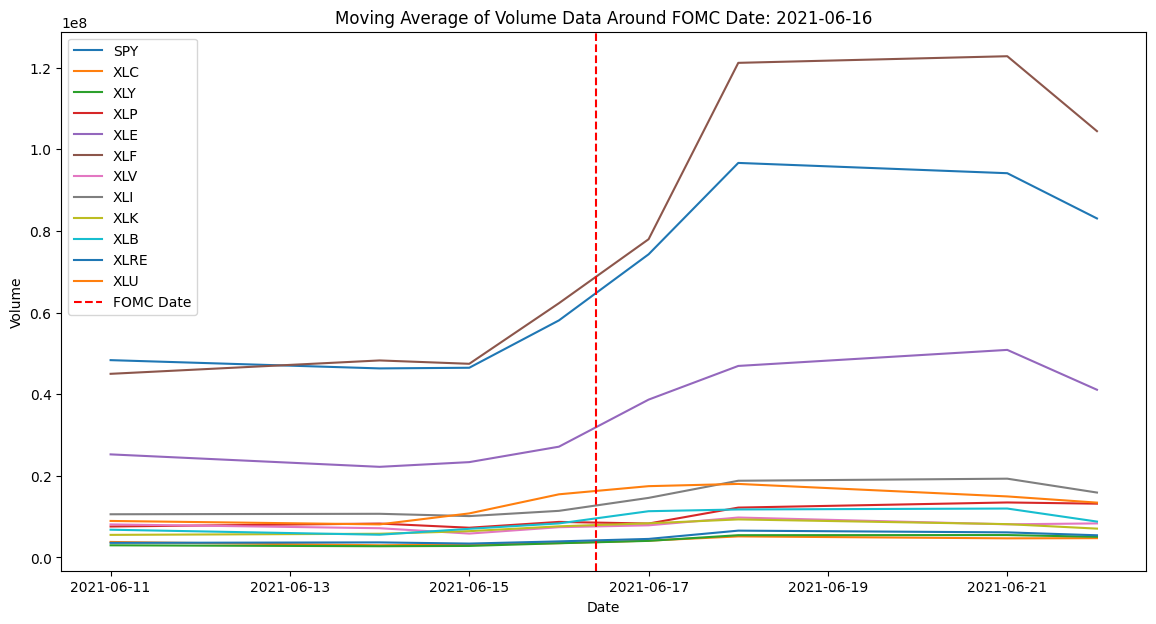

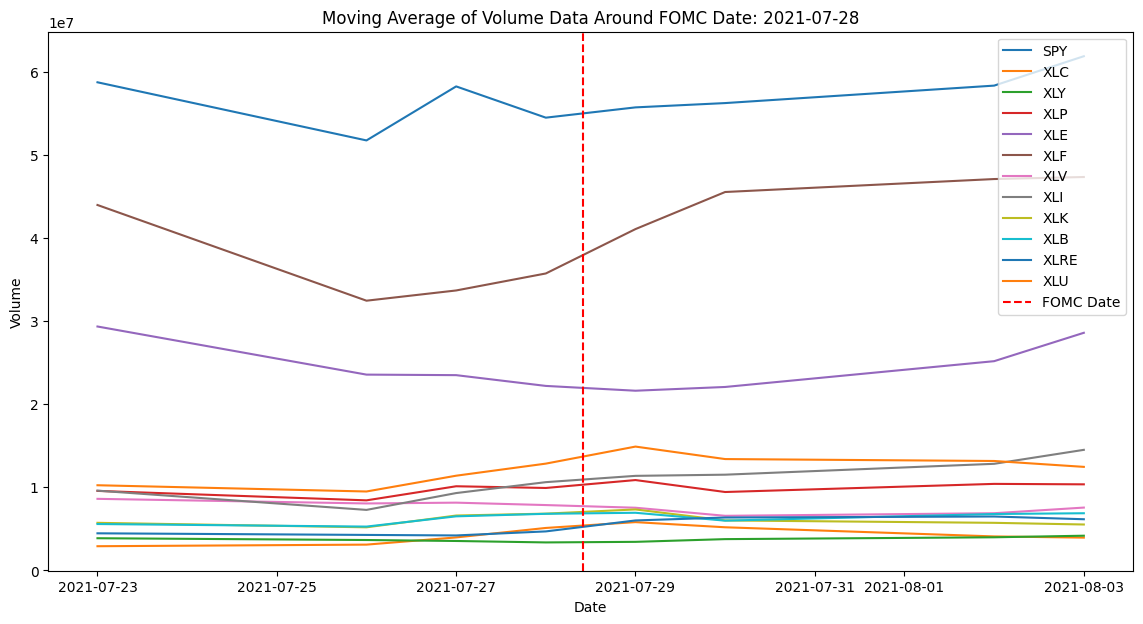

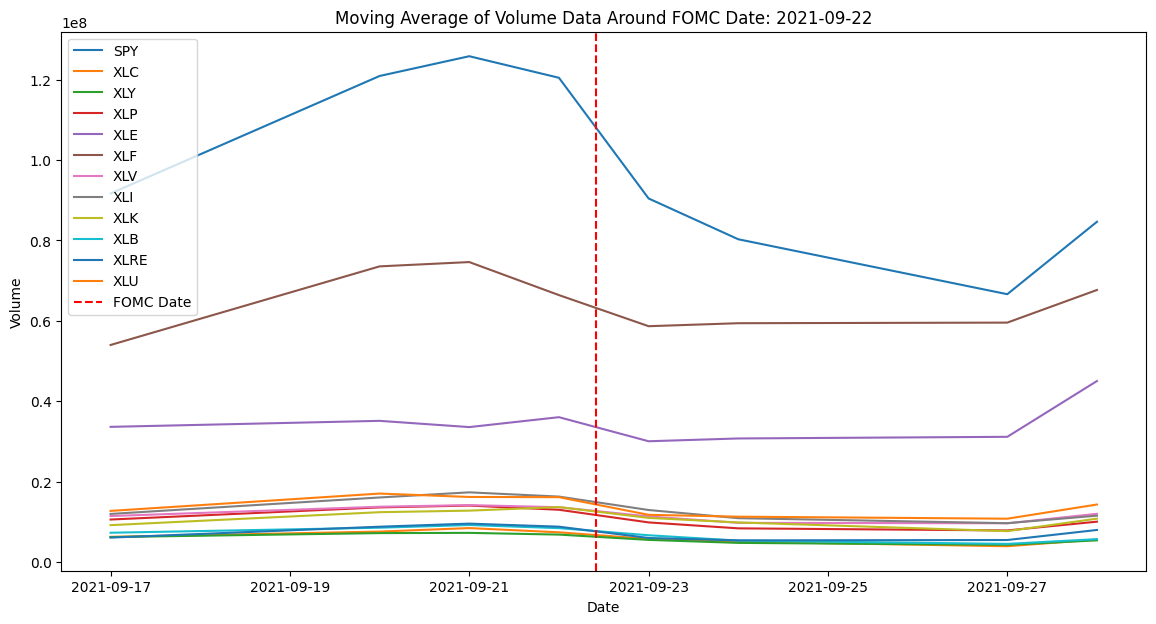

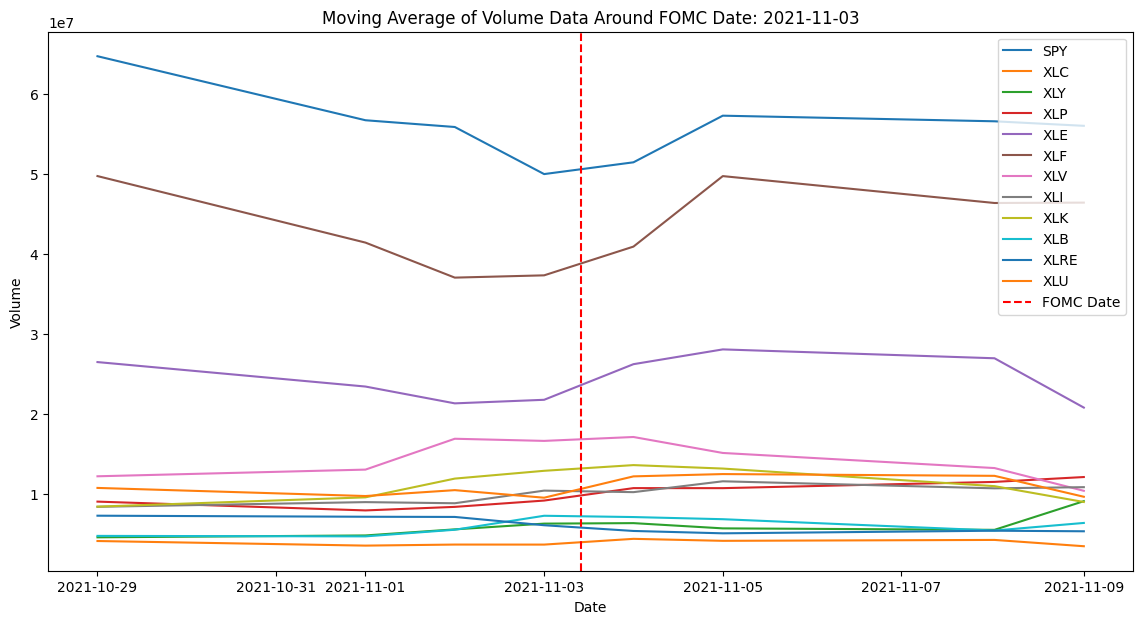

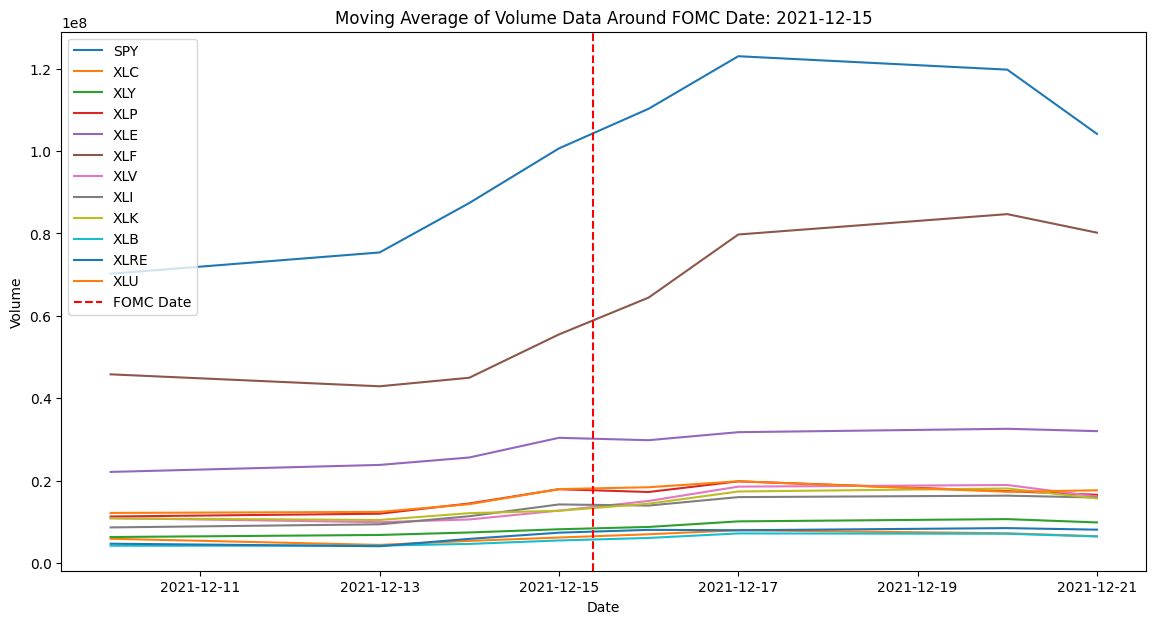

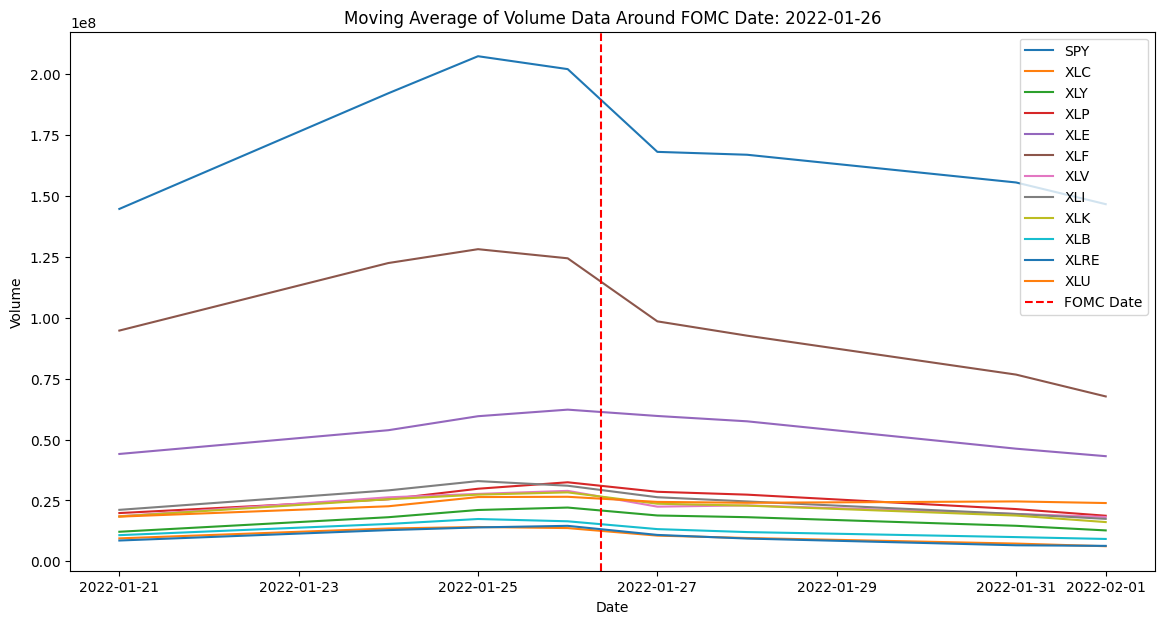

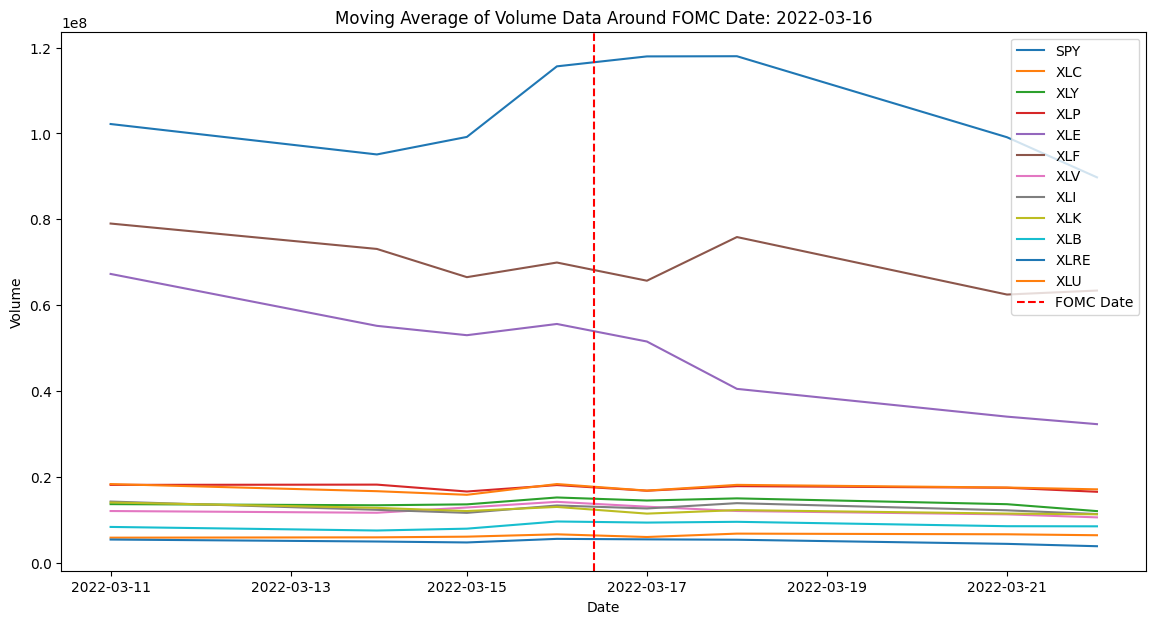

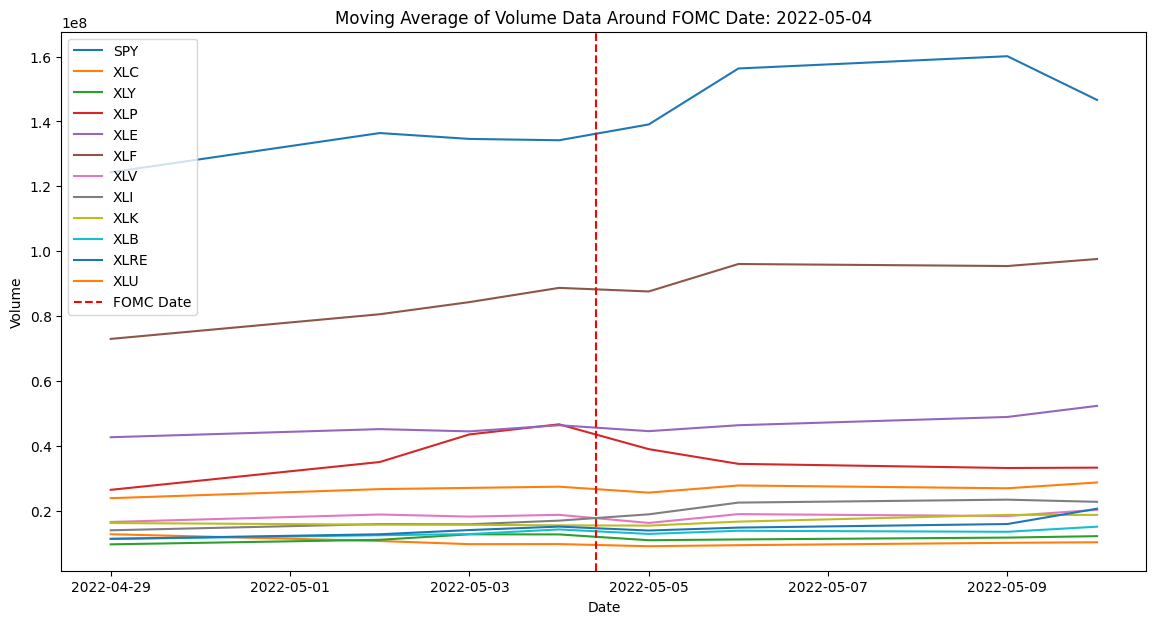

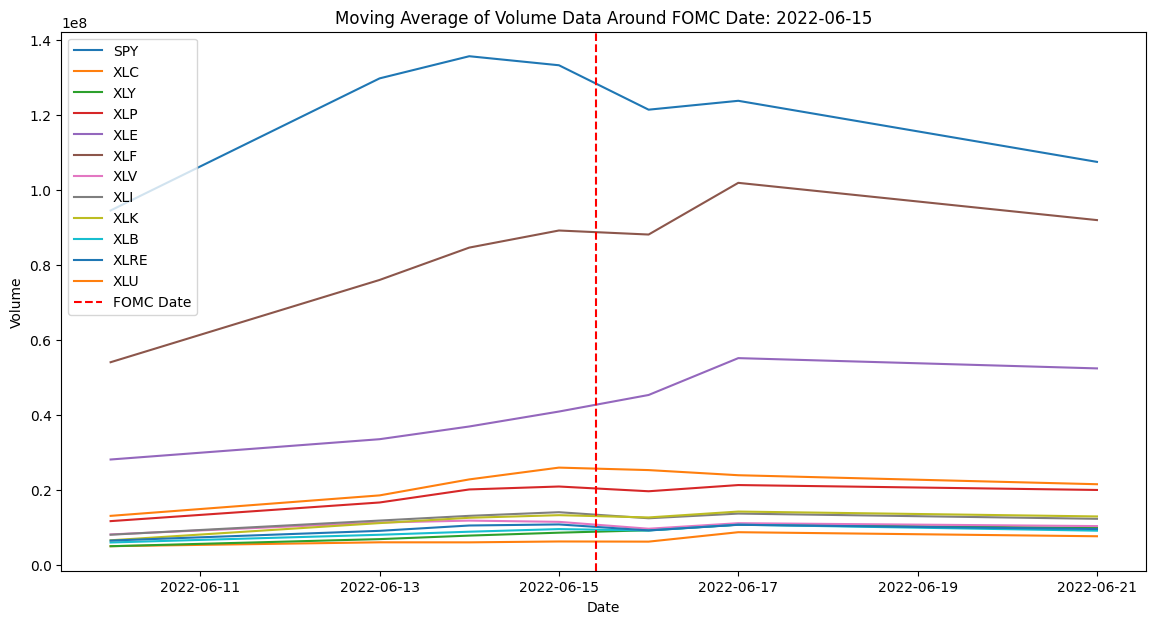

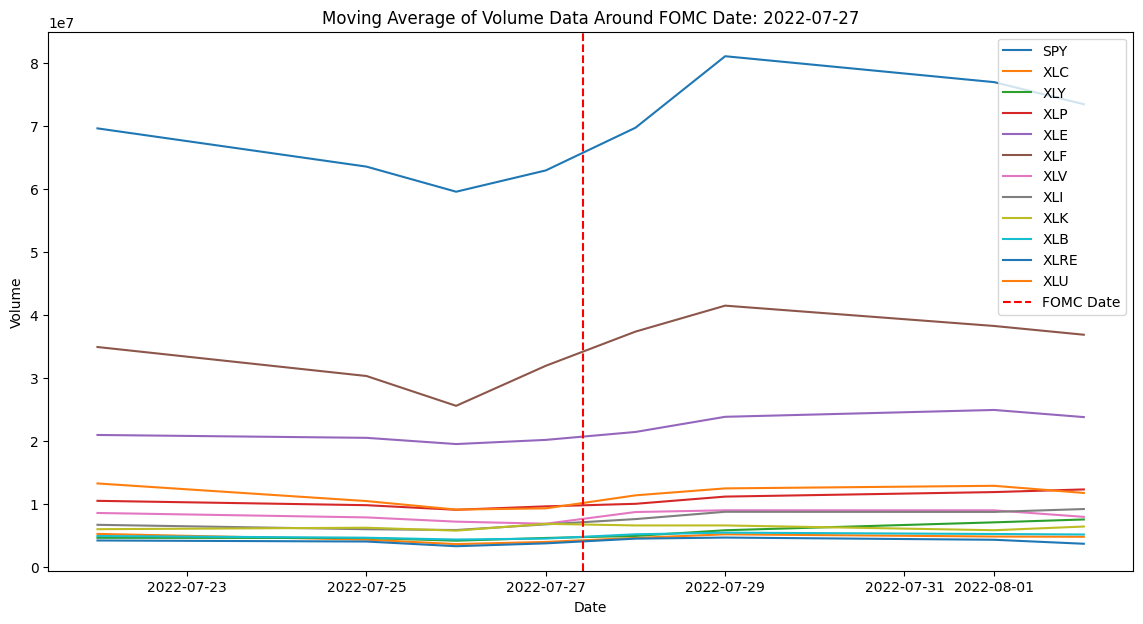

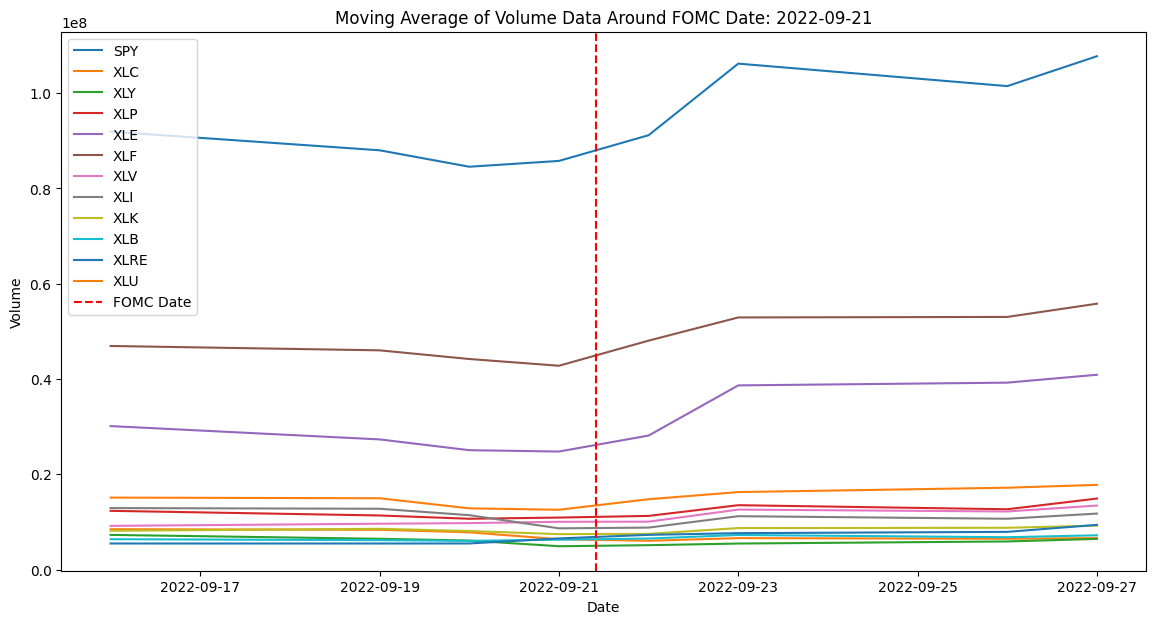

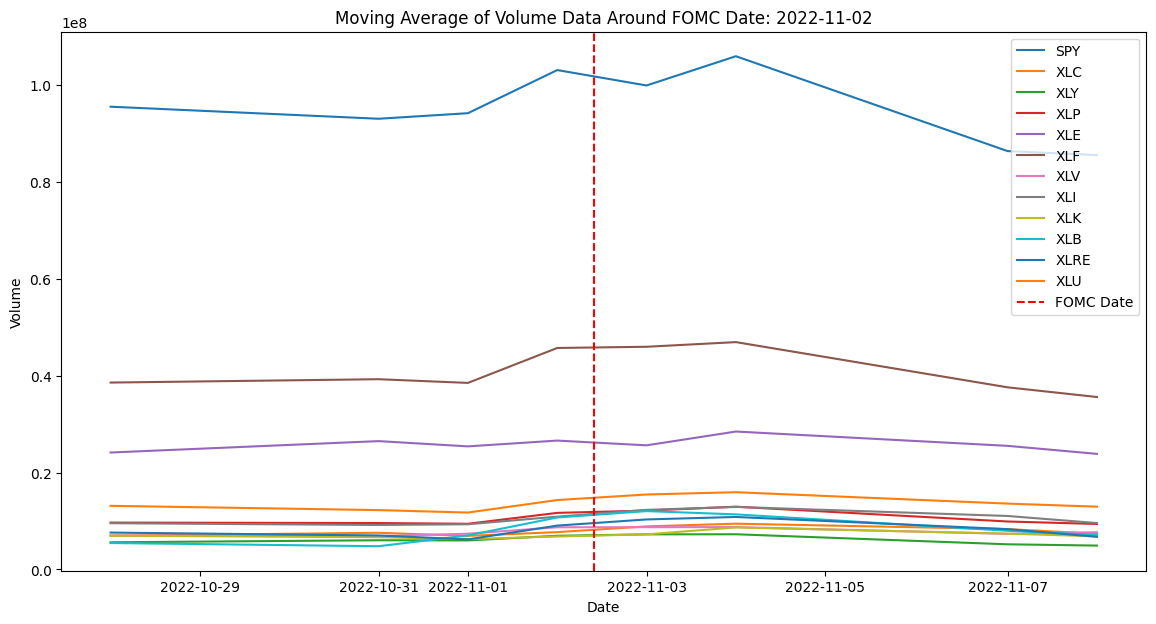

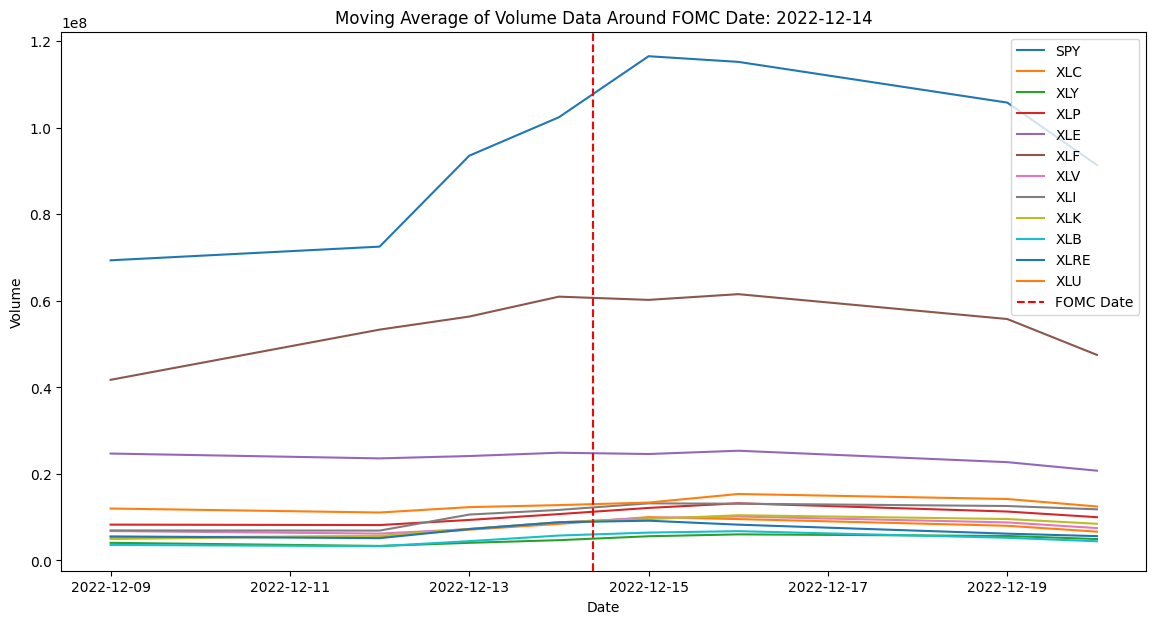

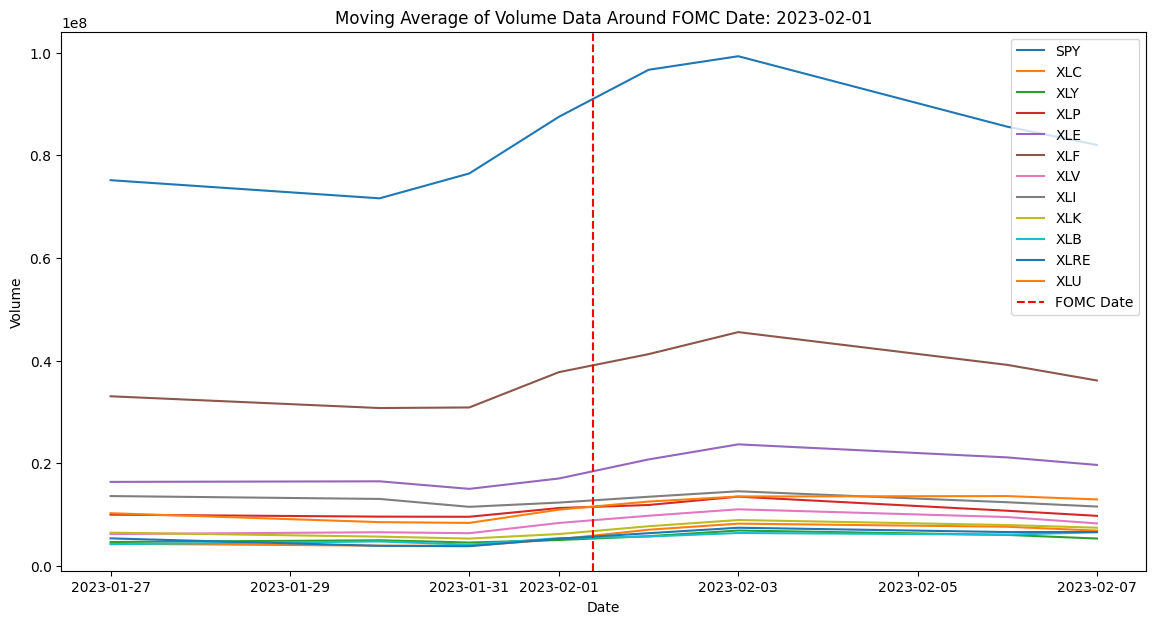

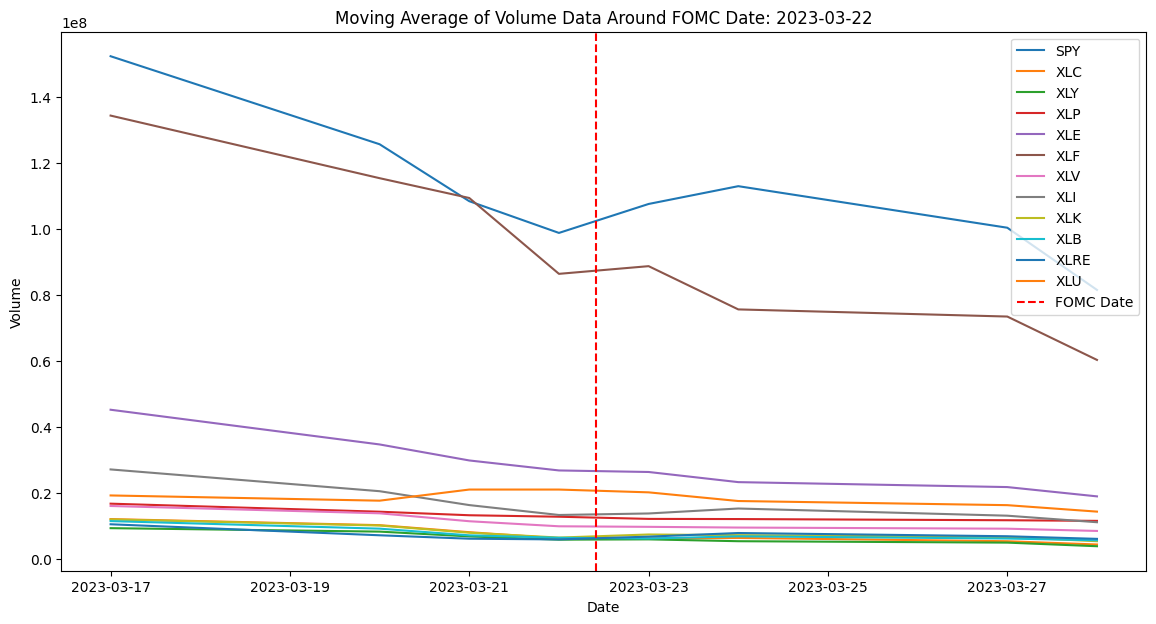

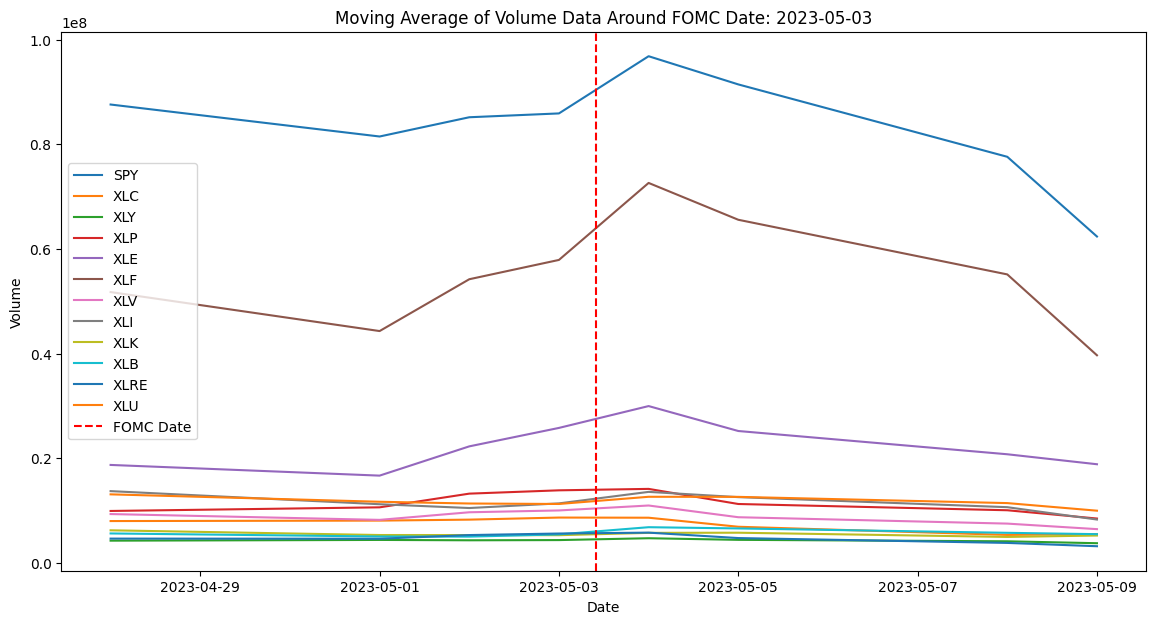

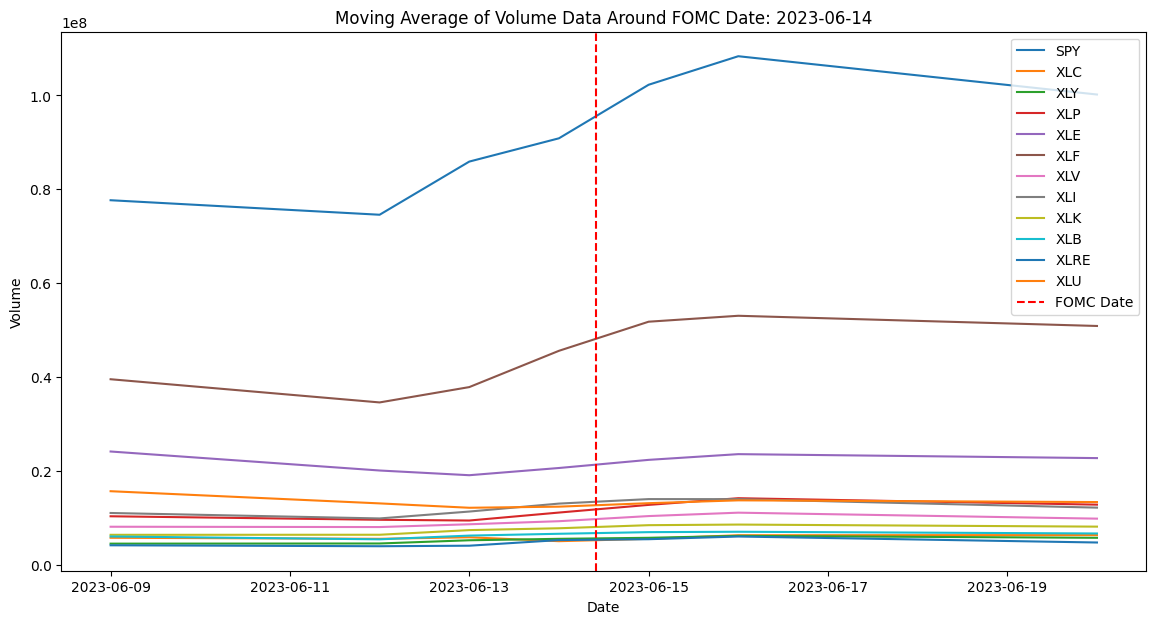

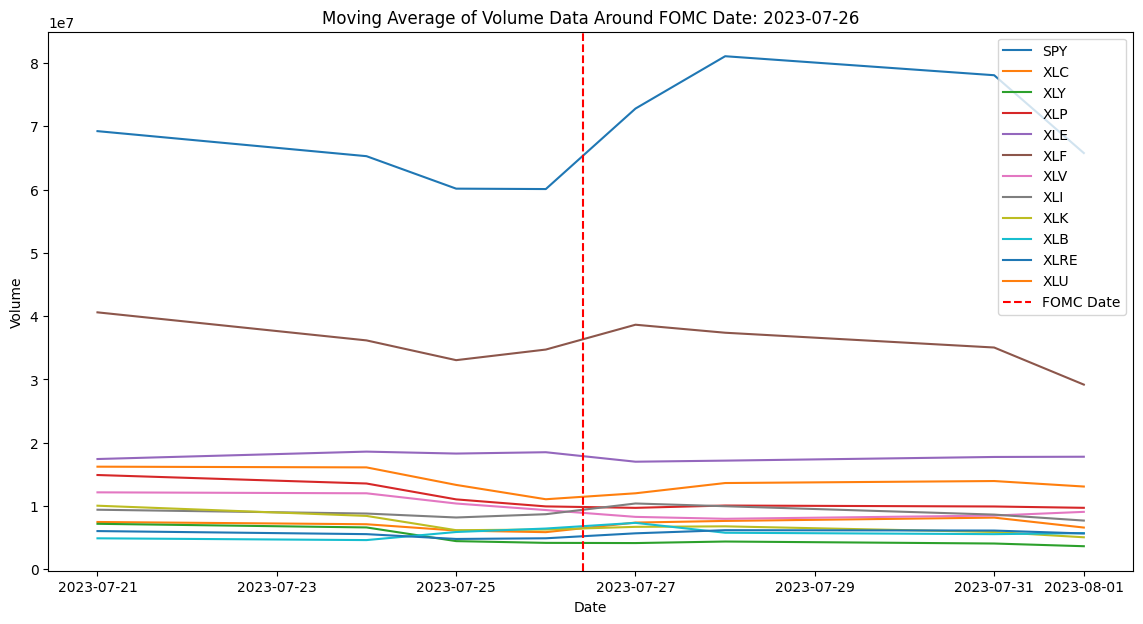

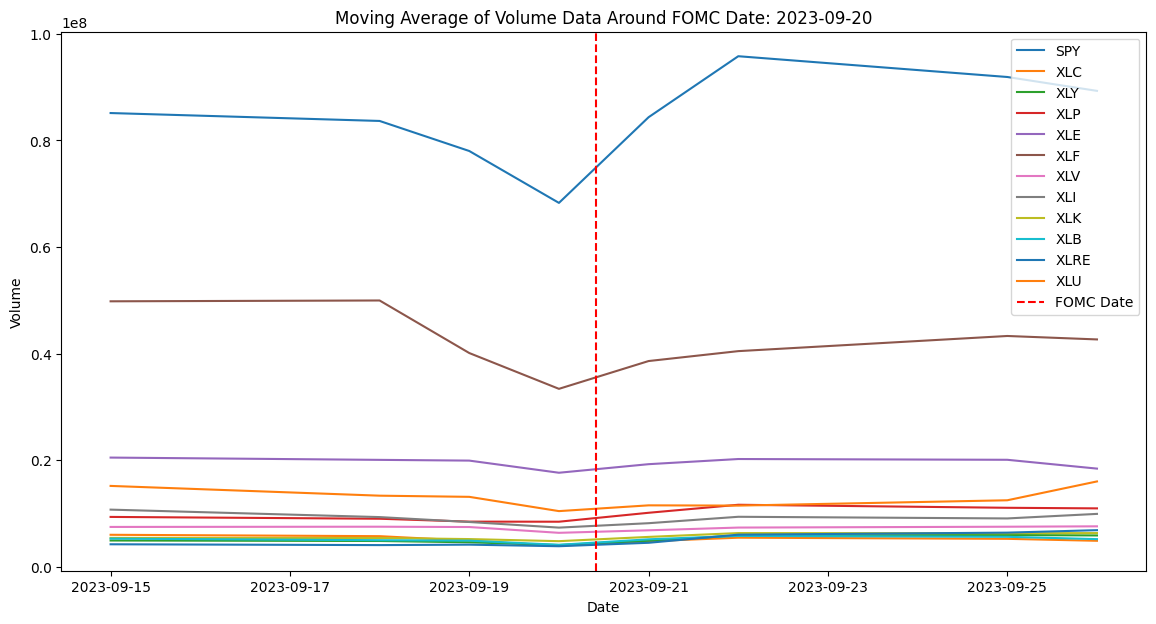

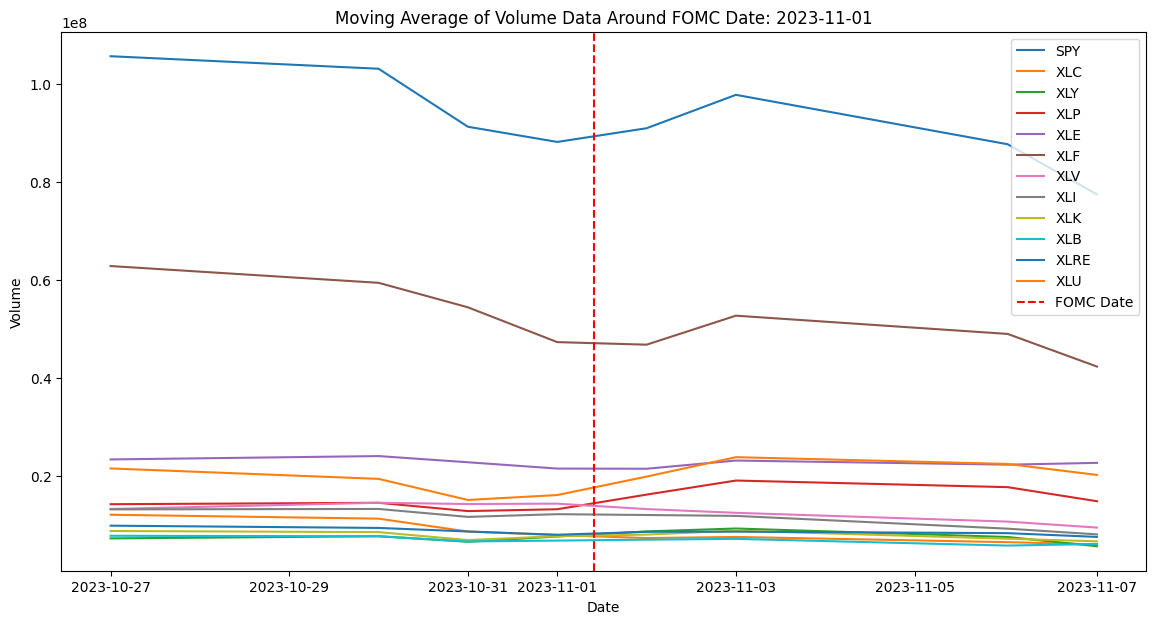

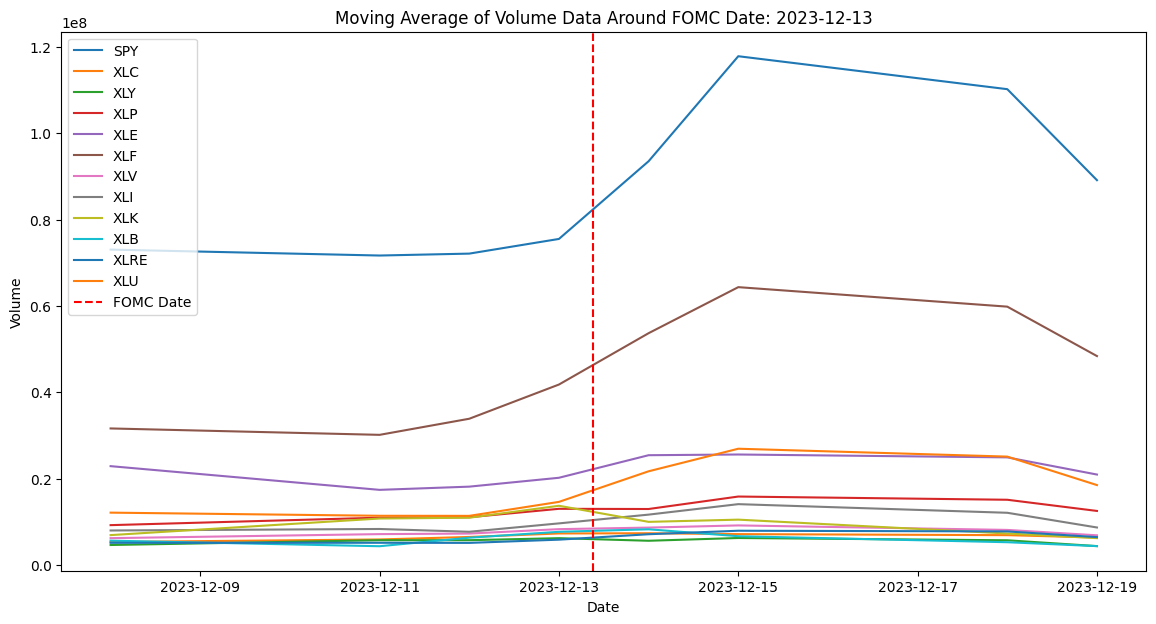

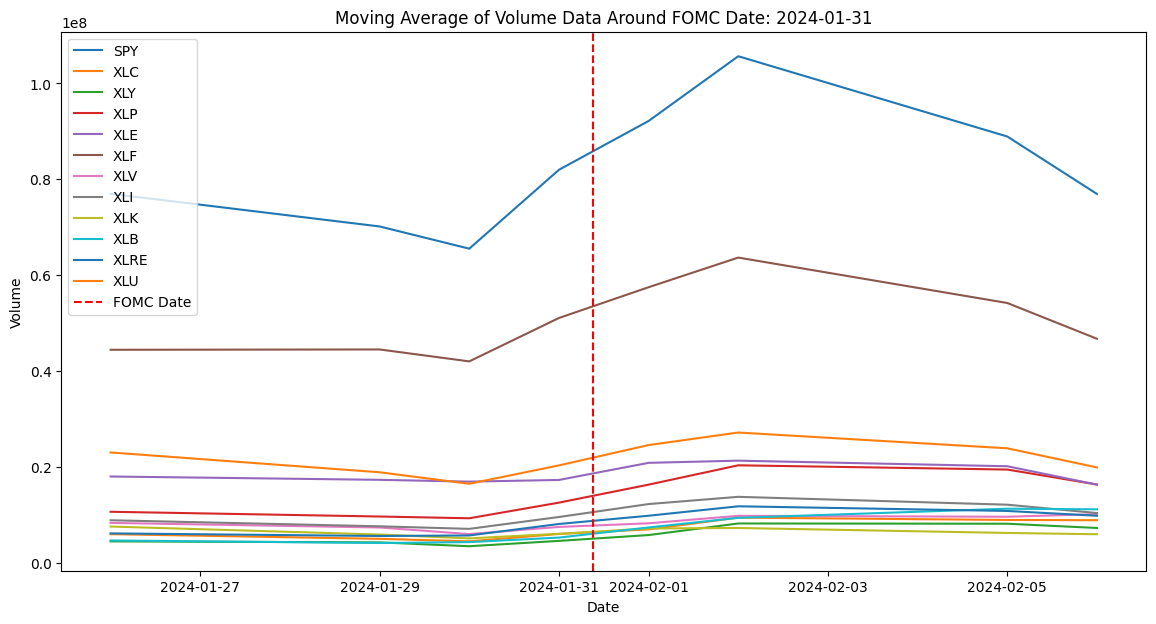

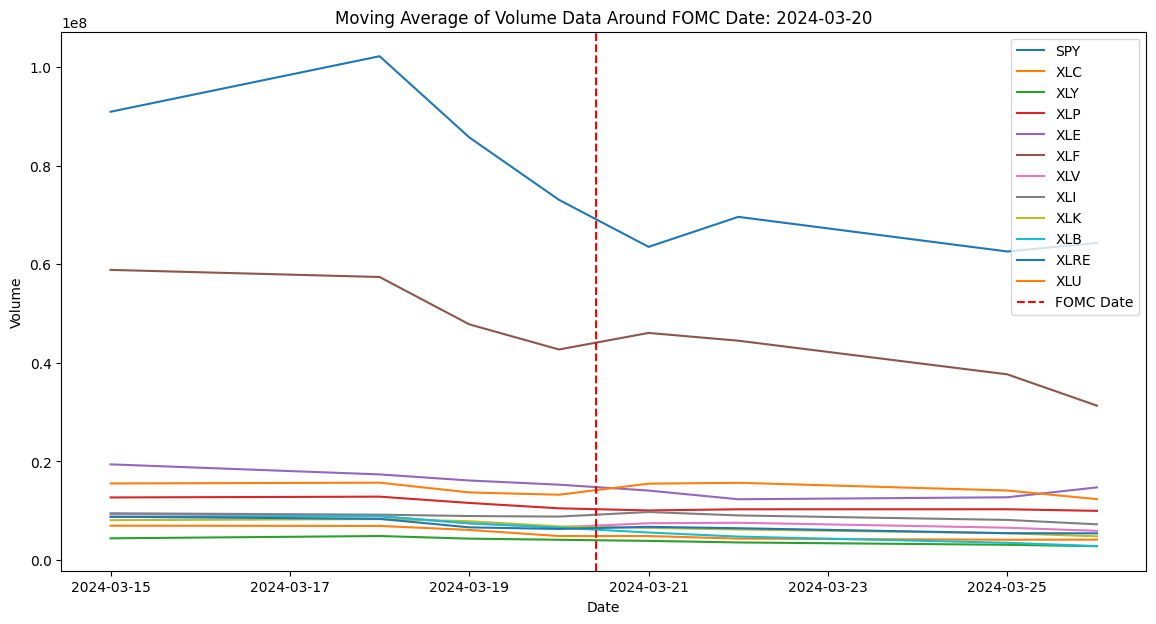

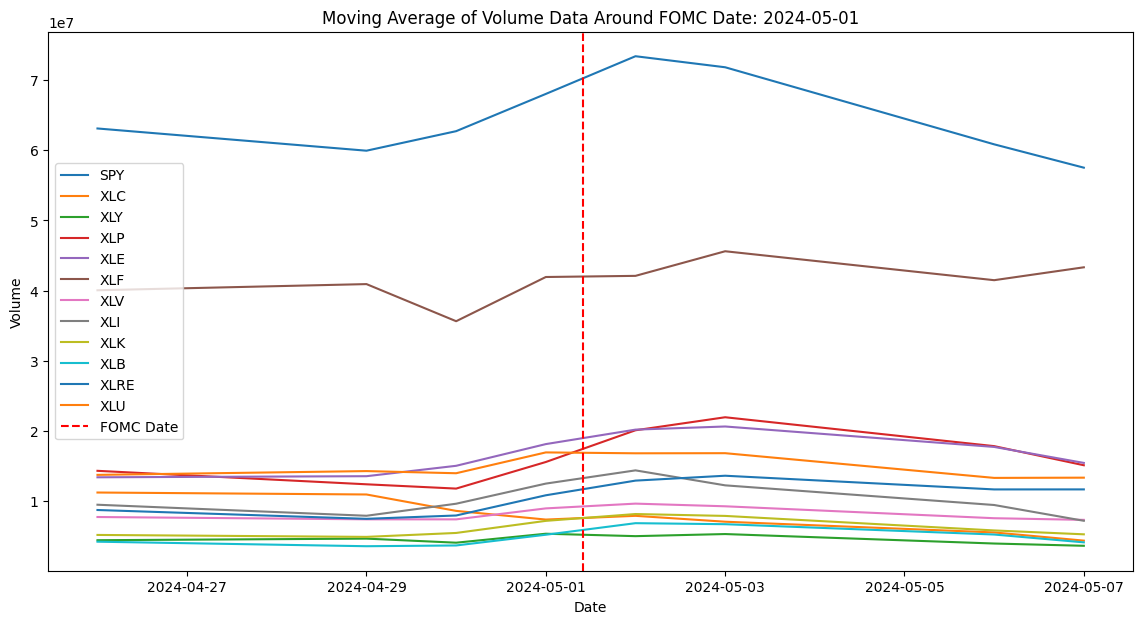

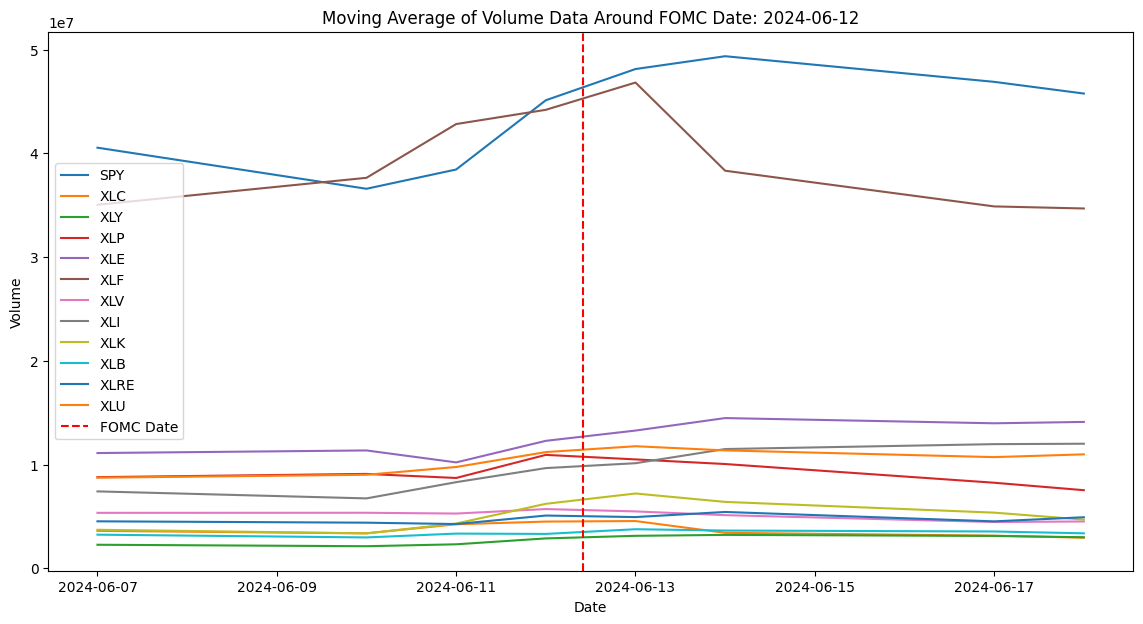

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the symbols
symbols = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLB", "XLRE", "XLU"]

# Define the FOMC dates
fomc_dates = [
    '2018-01-31 14:00', '2018-03-21 14:00', '2018-05-02 14:00', '2018-06-13 14:00', '2018-08-01 14:00', '2018-09-26 14:00', '2018-11-08 14:00', '2018-12-19 14:00',
    '2019-01-30 14:00', '2019-03-20 14:00', '2019-05-01 14:00', '2019-06-19 14:00', '2019-07-31 14:00', '2019-09-18 14:00', '2019-10-30 14:00', '2019-12-11 14:00',
    '2020-01-29 14:00', '2020-03-18 14:00', '2020-04-29 14:00', '2020-06-10 14:00', '2020-07-29 14:00', '2020-09-16 14:00', '2020-11-05 14:00', '2020-12-16 14:00',
    '2021-01-27 14:00', '2021-03-17 14:00', '2021-04-28 14:00', '2021-06-16 14:00', '2021-07-28 14:00', '2021-09-22 14:00', '2021-11-03 14:00', '2021-12-15 14:00',
    '2022-01-26 14:00', '2022-03-16 14:00', '2022-05-04 14:00', '2022-06-15 14:00', '2022-07-27 14:00', '2022-09-21 14:00', '2022-11-02 14:00', '2022-12-14 14:00',
    '2023-02-01 14:00', '2023-03-22 14:00', '2023-05-03 14:00', '2023-06-14 14:00', '2023-07-26 14:00', '2023-09-20 14:00', '2023-11-01 14:00', '2023-12-13 14:00',
    '2024-01-31 14:00', '2024-03-20 14:00', '2024-05-01 14:00', '2024-06-12 14:00'
]

# Convert FOMC dates to datetime
fomc_dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in fomc_dates]

# Define the period to analyze around each FOMC date (e.g., 7 days before and after)
period = 7

# Fetch data for the given symbols
def fetch_data(symbols, start_date, end_date):
    all_data = pd.DataFrame()
    for symbol in symbols:
        ticker = yf.Ticker(symbol)
        try:
            df = ticker.history(start=start_date, end=end_date, interval="1d")[["Volume"]]
            df.rename(columns={"Volume": symbol}, inplace=True)
            if all_data.empty:
                all_data = df
            else:
                all_data = all_data.join(df, how='outer')
        except Exception as e:
            print(f"Error fetching data for {symbol} from {start_date} to {end_date}: {e}")
    return all_data

# Function to analyze and plot volume data around FOMC dates
def analyze_fomc_effects(fomc_dates, symbols, period, window):
    for fomc_date in fomc_dates:
        start_date = fomc_date - timedelta(days=period)
        end_date = fomc_date + timedelta(days=period)
        data = fetch_data(symbols, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))
        
        # Calculate moving average
        moving_avg = data.rolling(window=window).mean()
        
        # Plot volume data around the FOMC date
        plt.figure(figsize=(14, 7))
        for symbol in symbols:
            if symbol in moving_avg.columns:
                plt.plot(moving_avg.index, moving_avg[symbol], label=symbol)
        
        plt.axvline(x=fomc_date, color='r', linestyle='--', label='FOMC Date')
        plt.title(f"Moving Average of Volume Data Around FOMC Date: {fomc_date.strftime('%Y-%m-%d')}")
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.legend()
        plt.show()

# Analyze and plot volume data around each FOMC date
analyze_fomc_effects(fomc_dates, symbols, period, window=3)


In [ ]:
'''
0,1 정규화
'''

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

# Define the symbols
symbols = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLB", "XLRE", "XLU"]

# Define the FOMC dates
fomc_dates = [
    '2018-01-31 14:00', '2018-03-21 14:00', '2018-05-02 14:00', '2018-06-13 14:00', '2018-08-01 14:00', '2018-09-26 14:00', '2018-11-08 14:00', '2018-12-19 14:00',
    '2019-01-30 14:00', '2019-03-20 14:00', '2019-05-01 14:00', '2019-06-19 14:00', '2019-07-31 14:00', '2019-09-18 14:00', '2019-10-30 14:00', '2019-12-11 14:00',
    '2020-01-29 14:00', '2020-03-18 14:00', '2020-04-29 14:00', '2020-06-10 14:00', '2020-07-29 14:00', '2020-09-16 14:00', '2020-11-05 14:00', '2020-12-16 14:00',
    '2021-01-27 14:00', '2021-03-17 14:00', '2021-04-28 14:00', '2021-06-16 14:00', '2021-07-28 14:00', '2021-09-22 14:00', '2021-11-03 14:00', '2021-12-15 14:00',
    '2022-01-26 14:00', '2022-03-16 14:00', '2022-05-04 14:00', '2022-06-15 14:00', '2022-07-27 14:00', '2022-09-21 14:00', '2022-11-02 14:00', '2022-12-14 14:00',
    '2023-02-01 14:00', '2023-03-22 14:00', '2023-05-03 14:00', '2023-06-14 14:00', '2023-07-26 14:00', '2023-09-20 14:00', '2023-11-01 14:00', '2023-12-13 14:00',
    '2024-01-31 14:00', '2024-03-20 14:00', '2024-05-01 14:00', '2024-06-12 14:00'
]

# Convert FOMC dates to datetime and group by year
fomc_dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in fomc_dates]
fomc_dates_by_year = {}
for date in fomc_dates:
    year = date.year
    if year not in fomc_dates_by_year:
        fomc_dates_by_year[year] = []
    fomc_dates_by_year[year].append(date)

# Define the period to analyze around each FOMC date (e.g., 7 days before and after)
period = 7

# Fetch data for the given symbols
def fetch_data(symbols, start_date, end_date):
    all_data = pd.DataFrame()
    valid_symbols = []
    for symbol in symbols:
        ticker = yf.Ticker(symbol)
        try:
            df = ticker.history(start=start_date, end=end_date, interval="1d")[["Volume"]]
            if not df.empty:
                df.rename(columns={"Volume": symbol}, inplace=True)
                if all_data.empty:
                    all_data = df
                else:
                    all_data = all_data.join(df, how='outer')
                valid_symbols.append(symbol)
        except Exception as e:
            print(f"Error fetching data for {symbol} from {start_date} to {end_date}: {e}")
    return all_data, valid_symbols

# Function to analyze and plot volume data around FOMC dates
def analyze_fomc_effects(fomc_dates_by_year, symbols, period):
    scaler = StandardScaler()
    for year, dates in fomc_dates_by_year.items():
        fig, axes = plt.subplots(len(dates), 1, figsize=(14, 7 * len(dates)))
        if len(dates) == 1:
            axes = [axes]
        
        for i, fomc_date in enumerate(dates):
            start_date = fomc_date - timedelta(days=period)
            end_date = fomc_date + timedelta(days=period)
            data, valid_symbols = fetch_data(symbols, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))
            
            if data.empty:
                print(f"No valid data for FOMC date: {fomc_date}")
                continue
            
            # Remove columns with NaN values to avoid errors during scaling
            data.dropna(axis=1, inplace=True)
            
            # Standardize the data
            standardized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
            
            # Plot standardized volume data around the FOMC date
            ax = axes[i]
            for symbol in valid_symbols:
                if symbol in standardized_data.columns:
                    ax.plot(standardized_data.index, standardized_data[symbol], label=symbol)
            
            ax.axvline(x=fomc_date, color='r', linestyle='--', label='FOMC Date')
            ax.set_title(f"Standardized Volume Data Around FOMC Date: {fomc_date.strftime('%Y-%m-%d')}")
            ax.set_xlabel("Date")
            ax.set_ylabel("Standardized Volume")
            ax.legend()
        
        plt.tight_layout()
        plt.savefig(f"fomc_volume_data_{year}.png")
        plt.close()
        print(f"Data for year {year} saved to fomc_volume_data_{year}.png")

# Analyze and save volume data around each FOMC date by year
analyze_fomc_effects(fomc_dates_by_year, symbols, period)


XLC: Data doesn't exist for startDate = 1516770000, endDate = 1517979600
XLC: Data doesn't exist for startDate = 1521000000, endDate = 1522209600
XLC: Data doesn't exist for startDate = 1524628800, endDate = 1525838400


Data for year 2018 saved to fomc_volume_data_2018.png
Data for year 2019 saved to fomc_volume_data_2019.png
Data for year 2020 saved to fomc_volume_data_2020.png
Data for year 2021 saved to fomc_volume_data_2021.png
Data for year 2022 saved to fomc_volume_data_2022.png
Data for year 2023 saved to fomc_volume_data_2023.png
Data for year 2024 saved to fomc_volume_data_2024.png


In [ ]:
'''
이평선
'''

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the symbols
symbols = ["SPY", "XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLK", "XLB", "XLRE", "XLU"]

# Define the FOMC dates
fomc_dates = [
    '2018-01-31 14:00', '2018-03-21 14:00', '2018-05-02 14:00', '2018-06-13 14:00', '2018-08-01 14:00', '2018-09-26 14:00', '2018-11-08 14:00', '2018-12-19 14:00',
    '2019-01-30 14:00', '2019-03-20 14:00', '2019-05-01 14:00', '2019-06-19 14:00', '2019-07-31 14:00', '2019-09-18 14:00', '2019-10-30 14:00', '2019-12-11 14:00',
    '2020-01-29 14:00', '2020-03-18 14:00', '2020-04-29 14:00', '2020-06-10 14:00', '2020-07-29 14:00', '2020-09-16 14:00', '2020-11-05 14:00', '2020-12-16 14:00',
    '2021-01-27 14:00', '2021-03-17 14:00', '2021-04-28 14:00', '2021-06-16 14:00', '2021-07-28 14:00', '2021-09-22 14:00', '2021-11-03 14:00', '2021-12-15 14:00',
    '2022-01-26 14:00', '2022-03-16 14:00', '2022-05-04 14:00', '2022-06-15 14:00', '2022-07-27 14:00', '2022-09-21 14:00', '2022-11-02 14:00', '2022-12-14 14:00',
    '2023-02-01 14:00', '2023-03-22 14:00', '2023-05-03 14:00', '2023-06-14 14:00', '2023-07-26 14:00', '2023-09-20 14:00', '2023-11-01 14:00', '2023-12-13 14:00',
    '2024-01-31 14:00', '2024-03-20 14:00', '2024-05-01 14:00', '2024-06-12 14:00'
]

# Convert FOMC dates to datetime and group by year
fomc_dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in fomc_dates]
fomc_dates_by_year = {}
for date in fomc_dates:
    year = date.year
    if year not in fomc_dates_by_year:
        fomc_dates_by_year[year] = []
    fomc_dates_by_year[year].append(date)

# Define the period to analyze around each FOMC date (e.g., 7 days before and after)
period = 7

# Fetch data for the given symbols
def fetch_data(symbols, start_date, end_date):
    all_data = pd.DataFrame()
    valid_symbols = []
    for symbol in symbols:
        ticker = yf.Ticker(symbol)
        try:
            df = ticker.history(start=start_date, end=end_date, interval="1d")[["Volume"]]
            if not df.empty:
                df.rename(columns={"Volume": symbol}, inplace=True)
                if all_data.empty:
                    all_data = df
                else:
                    all_data = all_data.join(df, how='outer')
                valid_symbols.append(symbol)
        except Exception as e:
            print(f"Error fetching data for {symbol} from {start_date} to {end_date}: {e}")
    return all_data, valid_symbols

# Function to analyze and plot volume data around FOMC dates
def analyze_fomc_effects(fomc_dates_by_year, symbols, period, window=5):
    for year, dates in fomc_dates_by_year.items():
        fig, axes = plt.subplots(len(dates), 1, figsize=(14, 7 * len(dates)))
        if len(dates) == 1:
            axes = [axes]
        
        for i, fomc_date in enumerate(dates):
            start_date = fomc_date - timedelta(days=period)
            end_date = fomc_date + timedelta(days=period)
            data, valid_symbols = fetch_data(symbols, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))
            
            if data.empty:
                print(f"No valid data for FOMC date: {fomc_date}")
                continue
            
            # Calculate moving average
            moving_avg = data.rolling(window=window).mean()
            
            # Plot moving average volume data around the FOMC date
            ax = axes[i]
            for symbol in valid_symbols:
                if symbol in moving_avg.columns:
                    ax.plot(moving_avg.index, moving_avg[symbol], label=symbol)
            
            ax.axvline(x=fomc_date, color='r', linestyle='--', label='FOMC Date')
            ax.set_title(f"Moving Average Volume Data Around FOMC Date: {fomc_date.strftime('%Y-%m-%d')}")
            ax.set_xlabel("Date")
            ax.set_ylabel("Moving Average Volume")
            ax.legend()
        
        plt.tight_layout()
        plt.savefig(f"fomc_moving_avg_data_{year}.png")
        plt.close()
        print(f"Data for year {year} saved to fomc_moving_avg_data_{year}.png")

# Analyze and save volume data around each FOMC date by year using moving average
analyze_fomc_effects(fomc_dates_by_year, symbols, period)


XLC: Data doesn't exist for startDate = 1516770000, endDate = 1517979600
XLC: Data doesn't exist for startDate = 1521000000, endDate = 1522209600
XLC: Data doesn't exist for startDate = 1524628800, endDate = 1525838400


Data for year 2018 saved to fomc_moving_avg_data_2018.png
Data for year 2019 saved to fomc_moving_avg_data_2019.png
Data for year 2020 saved to fomc_moving_avg_data_2020.png
Data for year 2021 saved to fomc_moving_avg_data_2021.png
Data for year 2022 saved to fomc_moving_avg_data_2022.png
Data for year 2023 saved to fomc_moving_avg_data_2023.png
Data for year 2024 saved to fomc_moving_avg_data_2024.png
